# **Exploratory Data Analysis (EDA)**



### **1. Import libraries**

In [1]:
import numpy as np ## pip install numpy==2.1 #need this to run ydata-profiling
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency # filter method
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pathlib import Path


### **2. Import data and apply first pre-processing**

At this point the dataframe to be explored is the original with the transformations made on the previous notebook 1.

The data for the project is available in this repository:
- Path: EDSB25_10\EDSB25_10\data\processed\
- Filename: cleaned_for_eda.csv
- The script preprocessing_for_EDA.py applies the first data pre-processing

In [2]:
#import sys
#sys.path.append('..')

from scripts.preprocessing_for_EDA import preprocess_for_eda

# Get the path of this notebook
base_path = Path.cwd()

# Build the path to the dataset relative to the project structure
data_path = base_path / "data" / "raw" / "HR_Attrition_Dataset.csv"

# Load the original file
HR_EDA = pd.read_csv(base_path / "data" / "raw" / "HR_Attrition_Dataset.csv")

# Apply the preprocessing function, available in scripts/preprocessing_for_EDA.py
HR_EDA = preprocess_for_eda(HR_EDA)


# Export to CSV
#processed_dir = base_path / "data" / "processed"
#processed_dir.mkdir(parents=True, exist_ok=True)
#output_path = processed_dir / "HR_EDA.csv"
#HR_EDA.to_csv(output_path, index=True)

#print(f"Saved HR_EDA to: {output_path}")


In [3]:
pd.set_option('display.max_columns', None)
HR_EDA.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### **3. Univariate data analysis**

The purpose of this section is to conduct a thorough analysis of individual variables to
understand their distributions and detect any anomalies or patterns.

#### **3.1. Numerical features**

##### 3.1.1. Describe and Histrogram visualization

Describe method outputs common statistics for numberical feature. However, one characterists of the dataset is that there are numerical features that are actually representing categories. Those will be also analysed on the next section.

In [4]:
HR_EDA.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


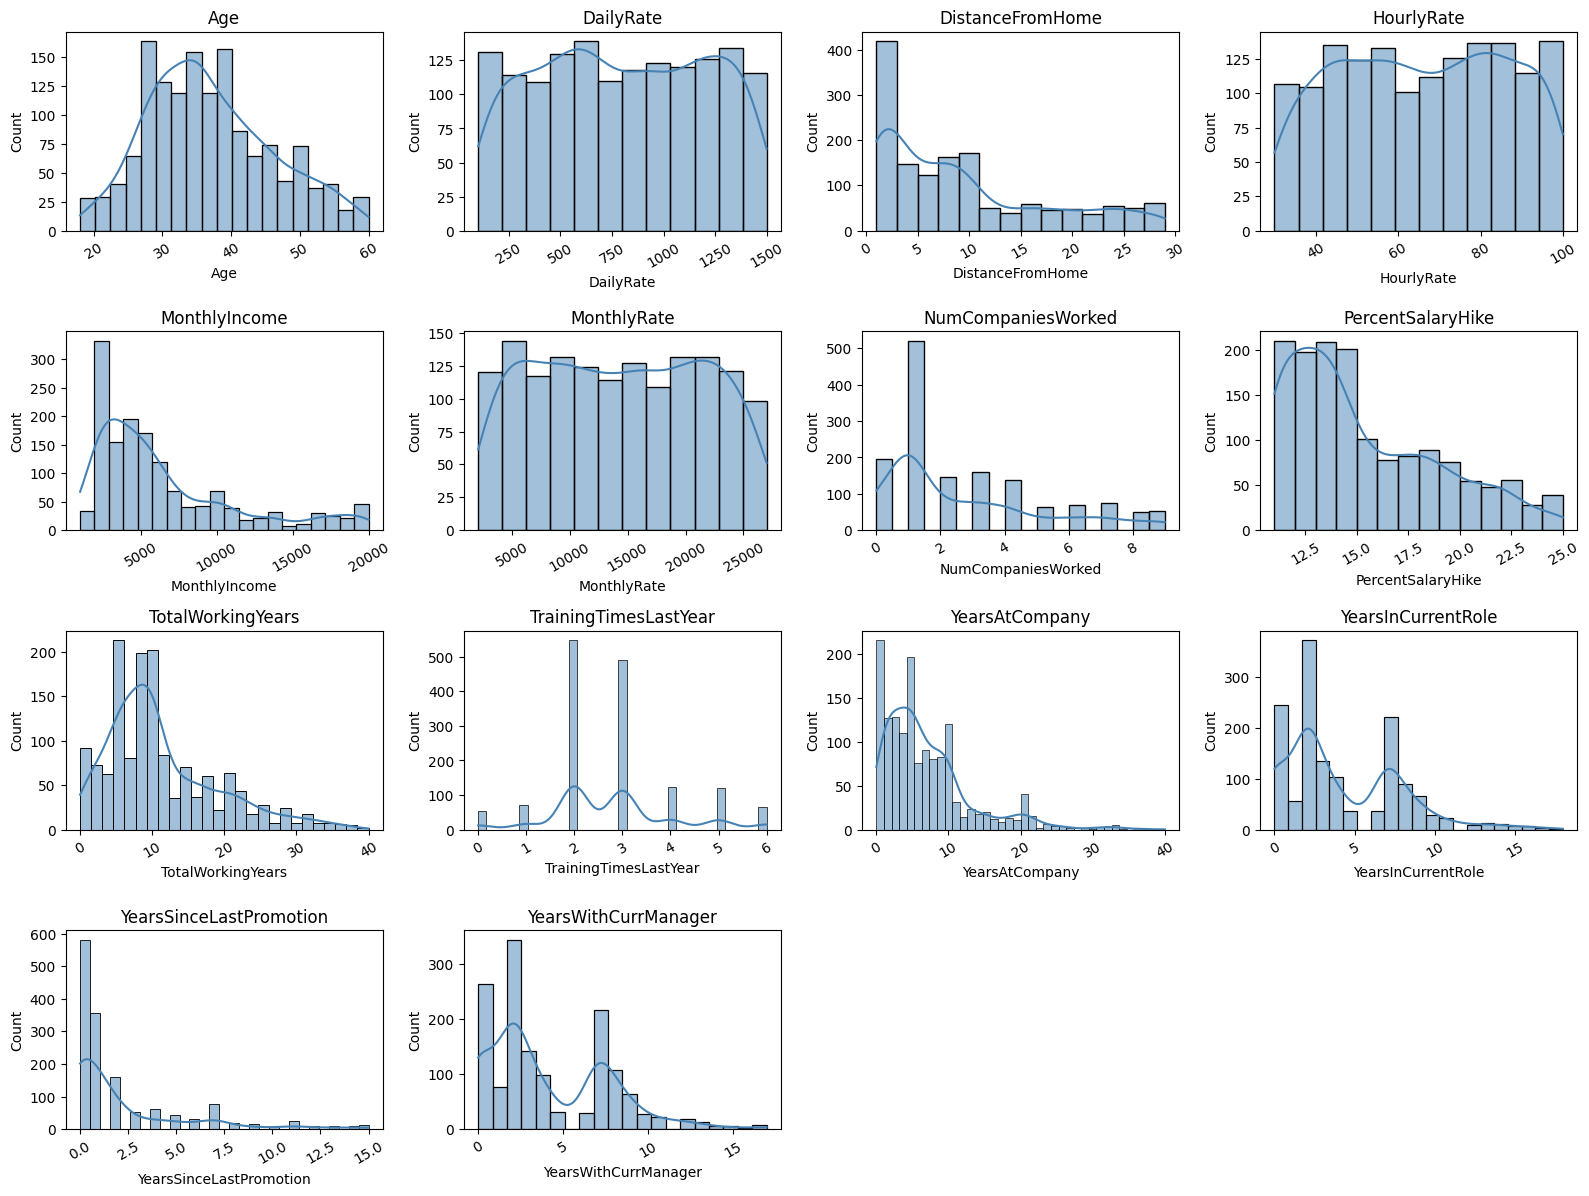

In [5]:
numeric_cols = ['Age','DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                'TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager' ]  # example list
n_cols = 4
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# Create histograms with KDE
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

for ax, col in zip(axes, numeric_cols):
    sns.histplot(HR_EDA[col].dropna(), kde=True, bins='auto', ax=ax, color='steelblue')
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=30)

# Hide any unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

To better understand the distribution of the numerical variables in the dataset, we analyze their **skewness** and **kurtosis**.

In [6]:
HR_EDA.skew(numeric_only=True)

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

DailyRate, EmployeeCount, and HourlyRate skewness values are extremely close to 0, suggesting that these numerical features are **approximately symmetrically distributed**.

JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are all right-skewed variables.

In [7]:
HR_EDA.kurt(numeric_only=True)

Age                        -0.404145
DailyRate                  -1.203823
DistanceFromHome           -0.224833
Education                  -0.559115
EnvironmentSatisfaction    -1.202521
HourlyRate                 -1.196398
JobInvolvement              0.270999
JobLevel                    0.399152
JobSatisfaction            -1.222193
MonthlyIncome               1.005233
MonthlyRate                -1.214956
NumCompaniesWorked          0.010214
PercentSalaryHike          -0.300598
PerformanceRating           1.695939
RelationshipSatisfaction   -1.184814
StockOptionLevel            0.364634
TotalWorkingYears           0.918270
TrainingTimesLastYear       0.494993
WorkLifeBalance             0.419460
YearsAtCompany              3.935509
YearsInCurrentRole          0.477421
YearsSinceLastPromotion     3.612673
YearsWithCurrManager        0.171058
dtype: float64

Many values are negative, indicating that the distributions have lighter tails than a normal distribution (fewer outliers). This confirms that most values cluster around the mean, and extreme values are rare in the numerical features.

##### 3.1.2. Outliers analysis

The following bloxplots are usefull to check visually the outliers per feature.

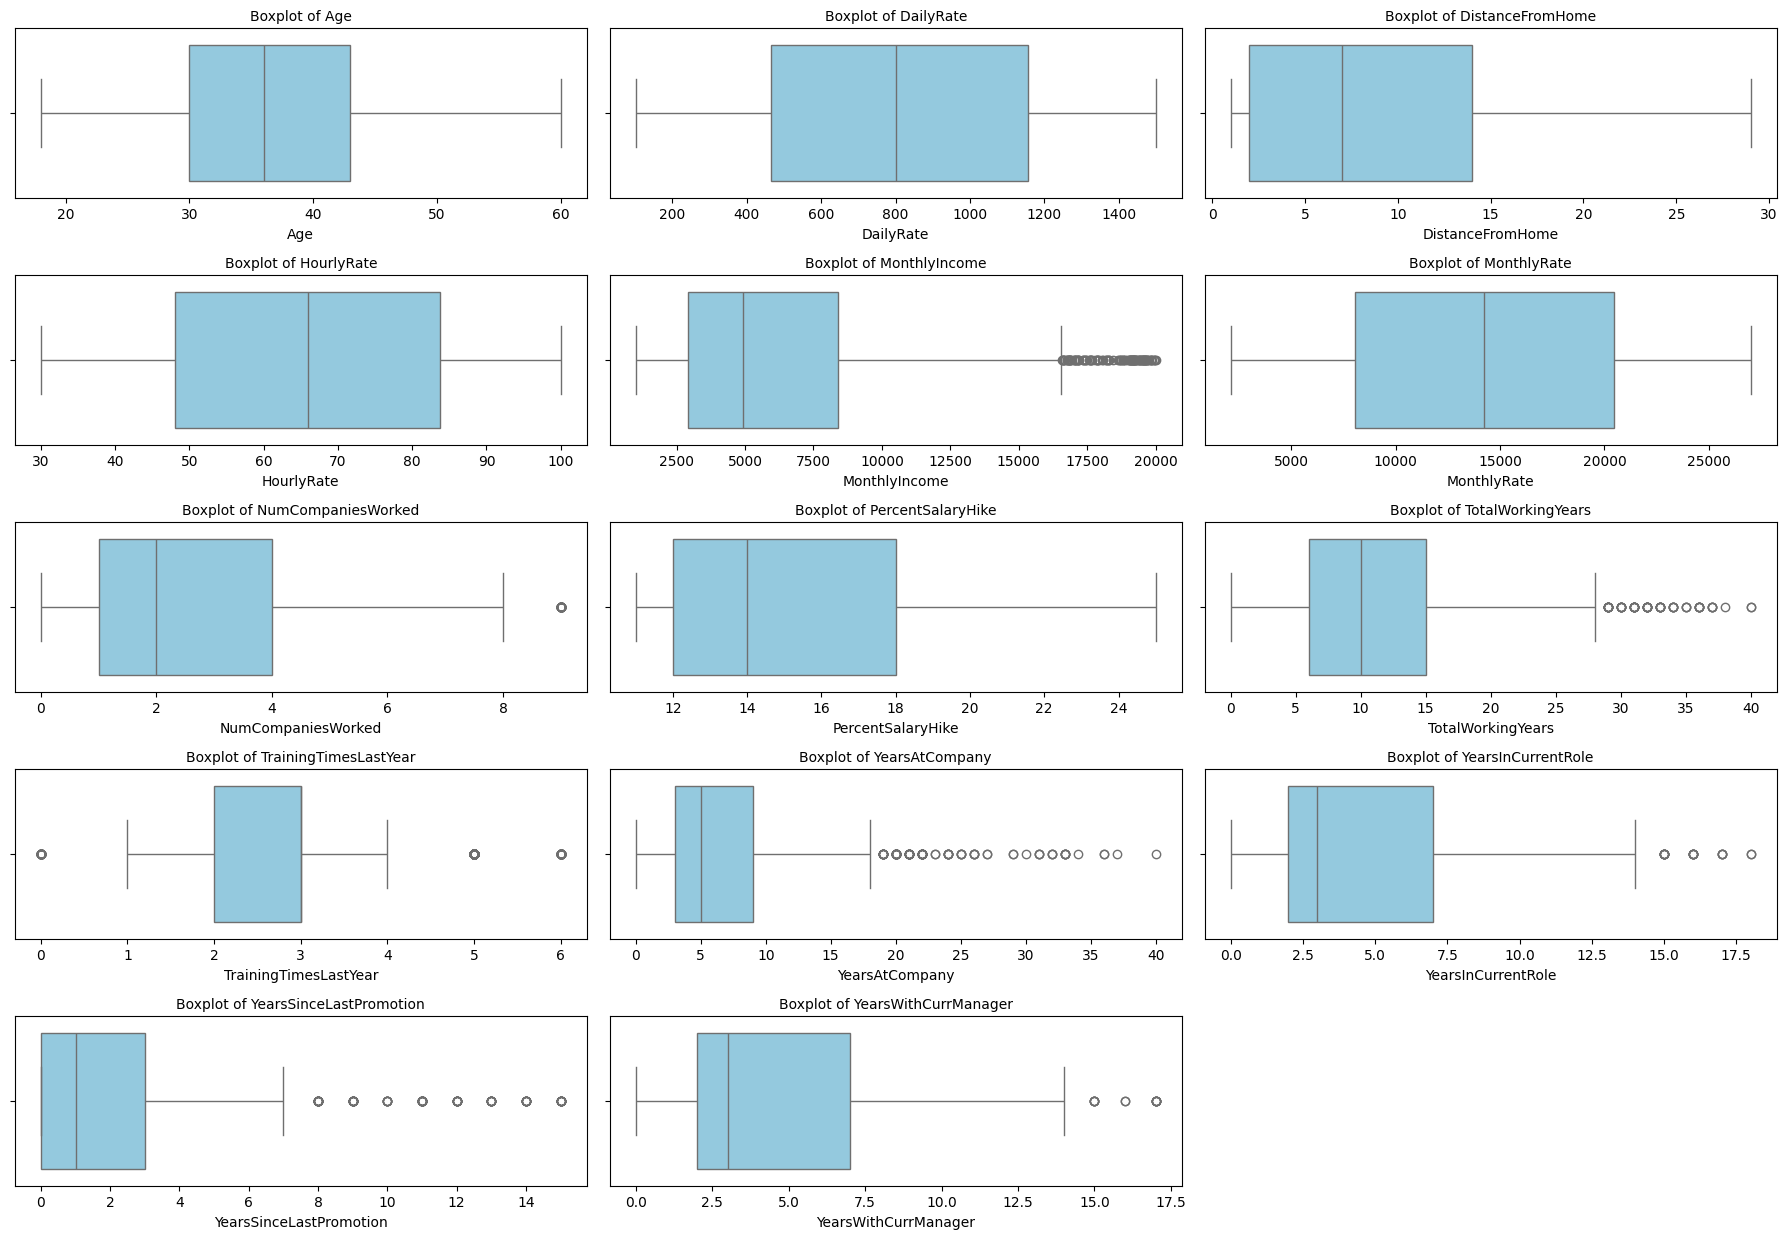

In [8]:
# Create subplots for each numerical feature, numeric_cols were set previouly
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 2.5*n_rows))  # wider & shorter
axes = axes.flatten()

# Create horizontal boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=HR_EDA, x=col, ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

As expected there are a few outliers in some variables, mainly in what concerns to montly incomes, total number of working years and the same in current rule. There a few exceptions regarding the number of years at the company, a few observations that weren't promoted for more than 7 years. Although there are outliers, they can hide important details to be used later, therefore they will remain here.

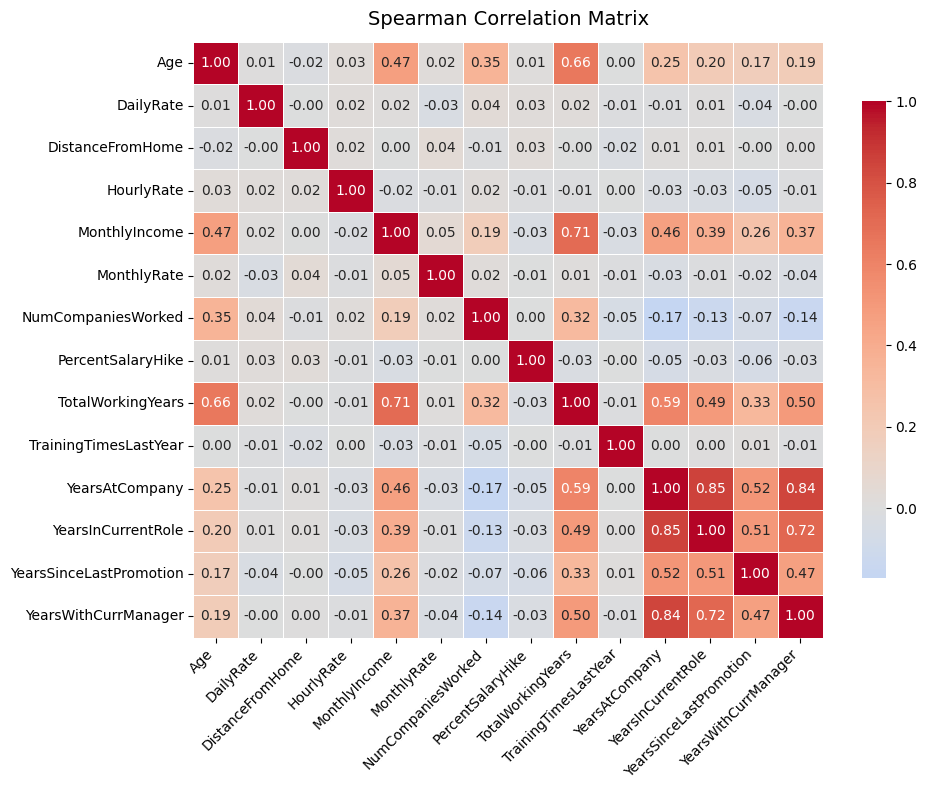

In [9]:
HR_scaled = HR_EDA.copy()
scaler = MinMaxScaler()
HR_scaled[numeric_cols] = scaler.fit_transform(HR_scaled[numeric_cols])

corr_matrix = HR_scaled[numeric_cols].corr(method='spearman')

# Heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',        # color palette
    center=0,               # zero-centered colors
    annot=True,             # adds correlation numbers
    fmt=".2f",              # two decimal places
    linewidths=0.5,         # lines between cells
    cbar_kws={"shrink": 0.8}  # smaller color bar
)

plt.title("Spearman Correlation Matrix", fontsize=14, pad=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### **Conclusions**


The employee **age** distribution is consistent with global employment standards, with no employees under 18 and a maximum age of 60. As indicated by the visualization, the distribution exhibits a slightly positive/right skew, suggesting that most employees are concentrated between their late twenties and late thirties. Furthermore, employees with a long tenure (e.g., 40 years of service) are clearly the exception, not the rule.

The distributions for **Daily, Hourly, and Monthly Rates** are generally spread out and close to uniform. This implies that compensation values are not heavily concentrated at any specific point (low, middle, or high end). Instead, rates are fairly evenly represented across the entire range between the minimum and maximum value for each respective variable.

The remaining employee features also present values that are consistent with the professional world:
There is a significant difference between the lowest and highest **monthly incomes**.
Smaller salary increases are more common than substantial hikes.

#### **3.2. Ordinal categorical features**

The dataset has variables that are represented by numbers but are actually categories. 


- Education: 
    - 1 = Below College
    - 2 = College
    - 3 = Bachelor
    - 4 = Master
    - 5 = Doctor
- EnvironmentSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobInvolvement
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- JobLevel
    - 1 = HC Rep
    - 2 = HR
    - 3 = Lab Technician
    - 4 = Manager
    - 5 = Managing Director
    - 6 = Research Director
- JobSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- PerformanceRating
    - 1 = Low
    - 2 = Good
    - 3 = Excellent
    - 4 = Outstanding
- RelationshipSatisfaction
    - 1 = Low
    - 2 = Medium
    - 3 = High
    - 4 = Very High
- StockOptionLevel - 0 to 4
- WorkLifeBalance
    - 1 = Bad
    - 2 = Good
    - 3 = Better 
    - 4 = Best

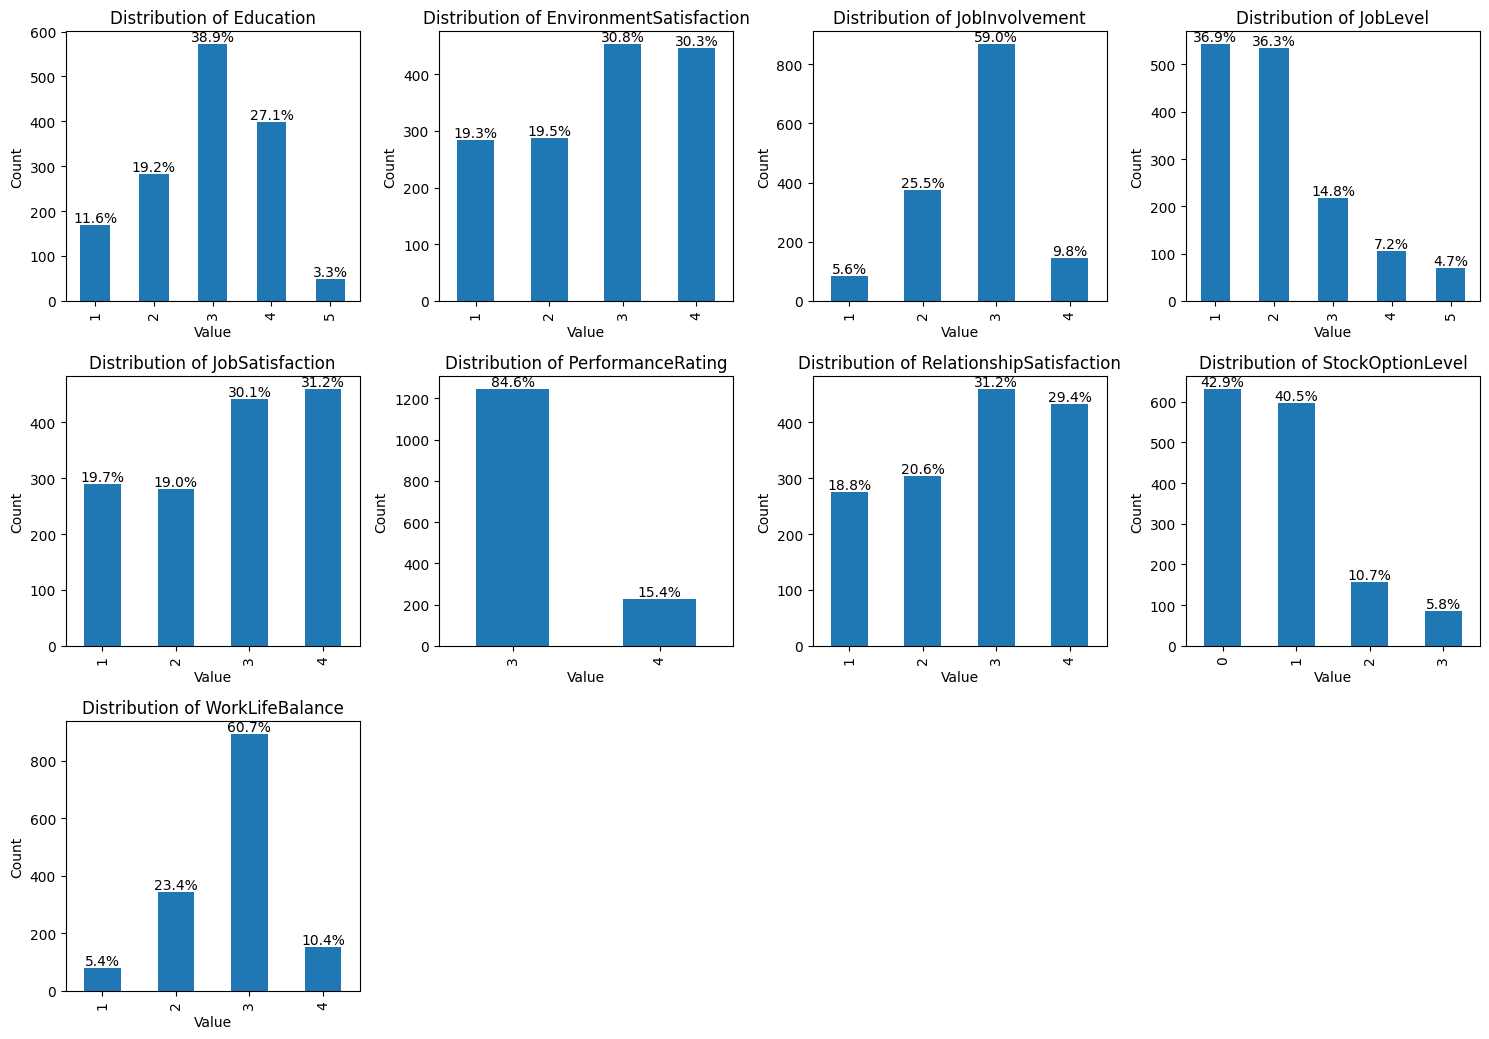


Education Distribution:
           Count  Percentage
Education                   
1            170   11.564626
2            282   19.183673
3            572   38.911565
4            398   27.074830
5             48    3.265306

EnvironmentSatisfaction Distribution:
                         Count  Percentage
EnvironmentSatisfaction                   
1                          284   19.319728
2                          287   19.523810
3                          453   30.816327
4                          446   30.340136

JobInvolvement Distribution:
                Count  Percentage
JobInvolvement                   
1                  83    5.646259
2                 375   25.510204
3                 868   59.047619
4                 144    9.795918

JobLevel Distribution:
          Count  Percentage
JobLevel                   
1           543   36.938776
2           534   36.326531
3           218   14.829932
4           106    7.210884
5            69    4.693878

JobSatisfaction Dist

In [10]:
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 
                'JobLevel', 'JobSatisfaction', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

# Create a figure and subplots
n_cols = 4
n_rows = (len(ordinal_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 3.5*n_rows))

for i, col in enumerate(ordinal_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Calculate value counts and percentages
    counts = HR_EDA[col].value_counts().sort_index()
    percentages = HR_EDA[col].value_counts(normalize=True).sort_index() * 100
    
    # Create bar plot
    ax = counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    # Add percentage labels on top of each bar
    for j, v in enumerate(counts):
        plt.text(j, v, f'{percentages[counts.index[j]]:.1f}%', 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics for each column
for col in ordinal_cols:
    print(f"\n{col} Distribution:")
    stats = pd.DataFrame({
        'Count': HR_EDA[col].value_counts().sort_index(),
        'Percentage': HR_EDA[col].value_counts(normalize=True).sort_index() * 100
    })
    print(stats)

#### **3.3. Nominal categorical features**

In [11]:
HR_EDA.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [12]:
HR_EDA.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


In [13]:
HR_cat = HR_EDA.select_dtypes(include=['object'])
for col in HR_cat.columns:
  print(HR_cat[col].value_counts(dropna=False, normalize=True), end='\n\n')

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.

**Highlights:**

- Attrition, Gender, and OverTime are binary classes, while the remaining categorical variables are multiclass.

- Some classes are underrepresented such as Human Resources in Job Roles, and Human Resources in Department and Education Field (under 5% representation). 

- Most categorical variables have non-balanced distributions (one class is more represented than the others).

- This analysis indicates that using a Stratified k fold will be necessary to manage imbalances. To avoid leakage the encoding, scaling and feature selection will be performed inside each fold, using the SMOTE for the target variable only to the training split.



## **4. Bivariate data analysis**

Now we shall inspect how the Attrition behaves according to the remaining variables.

### **4.1. Numerical features**

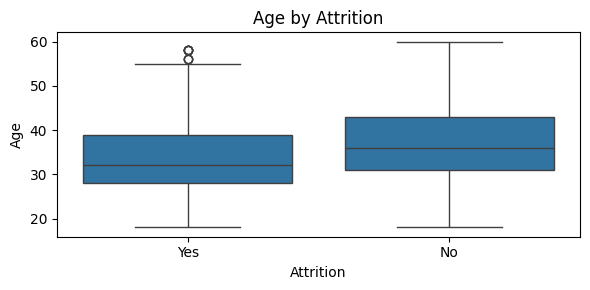

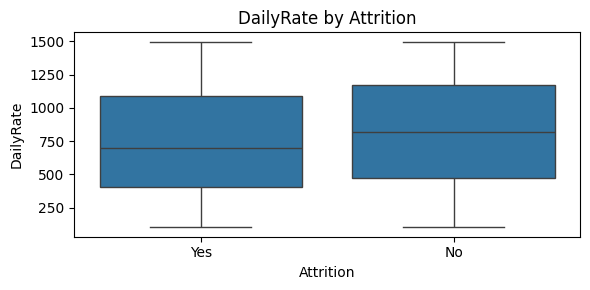

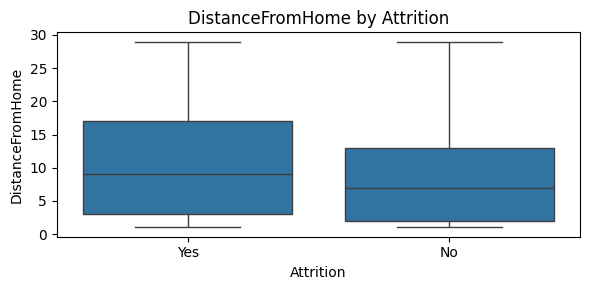

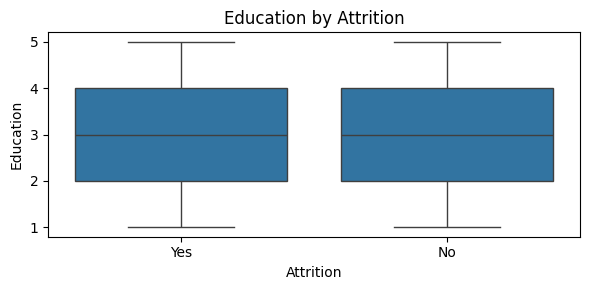

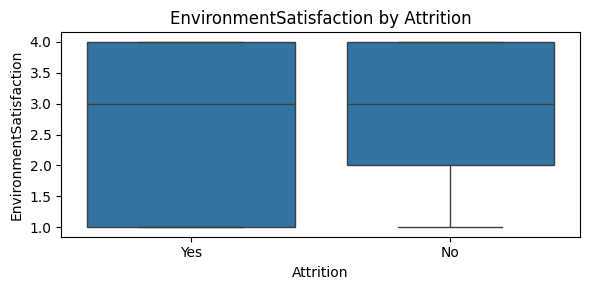

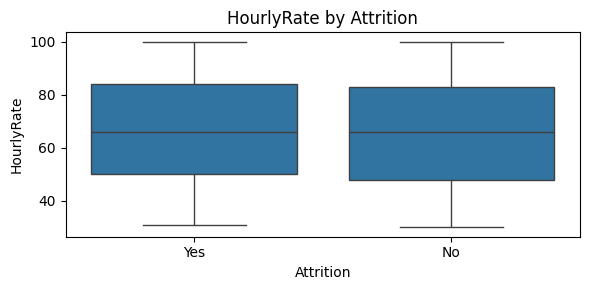

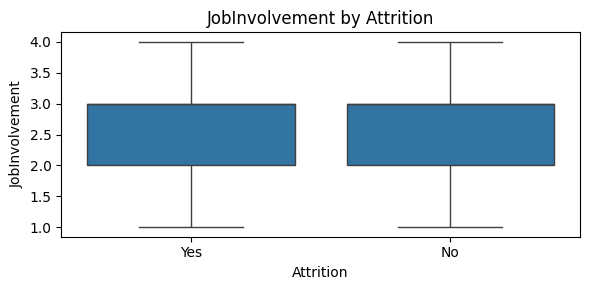

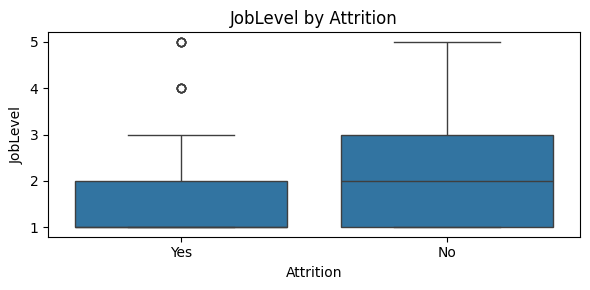

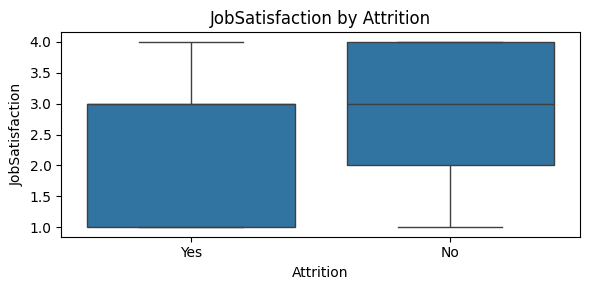

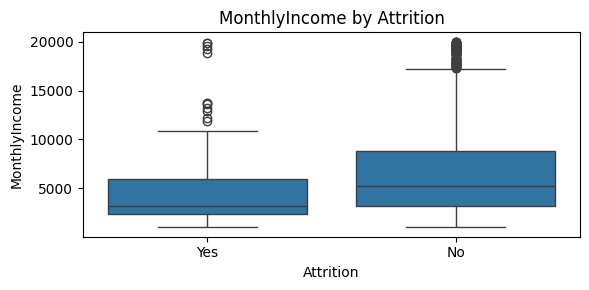

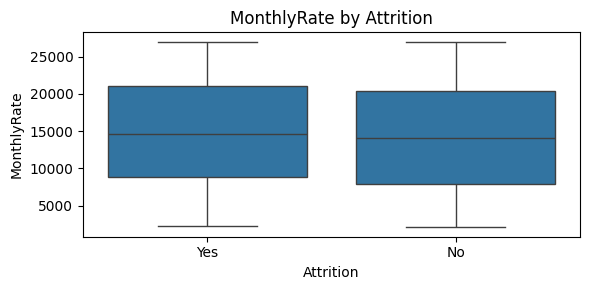

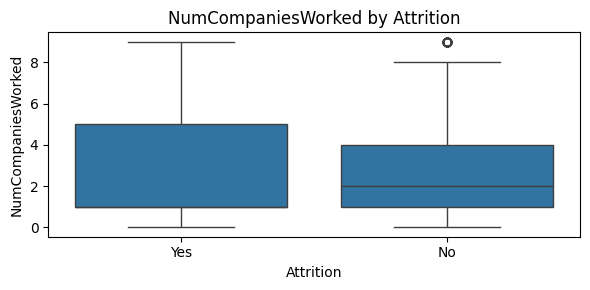

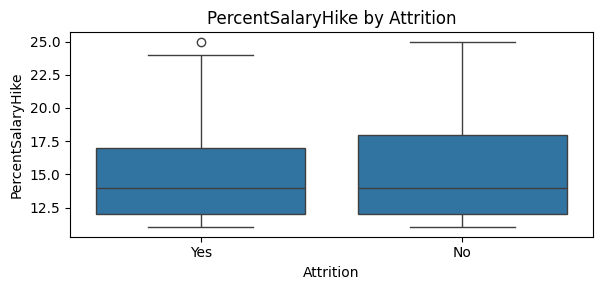

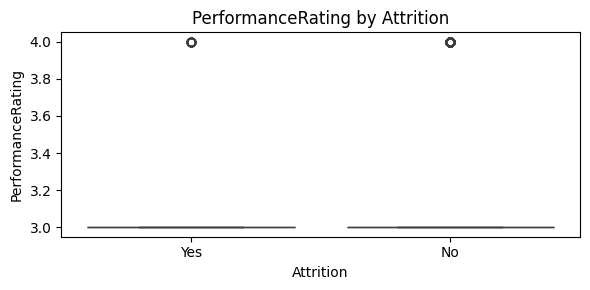

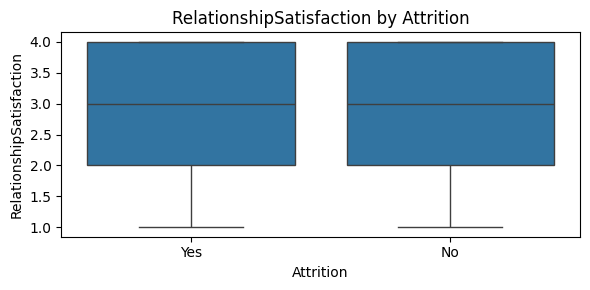

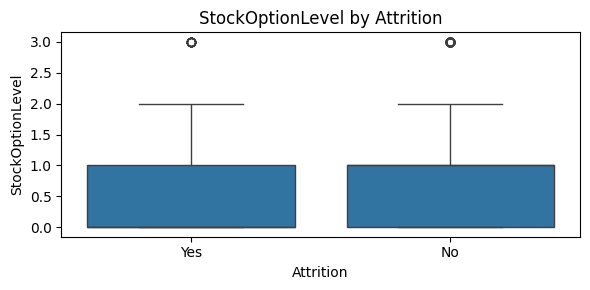

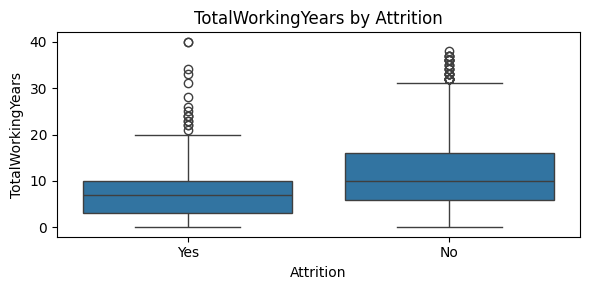

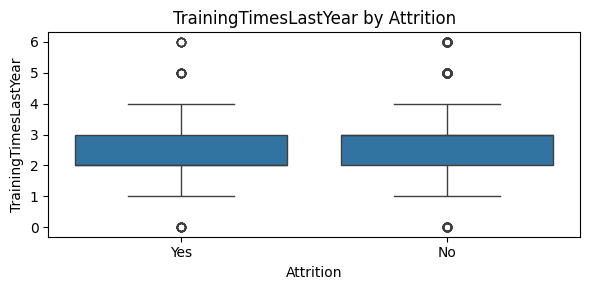

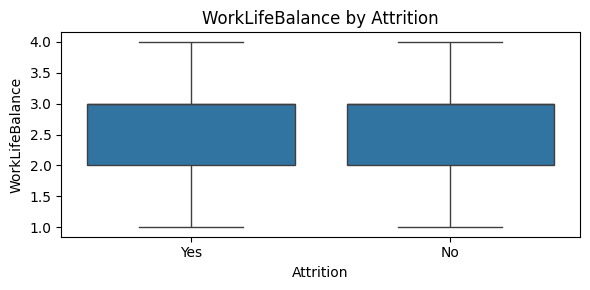

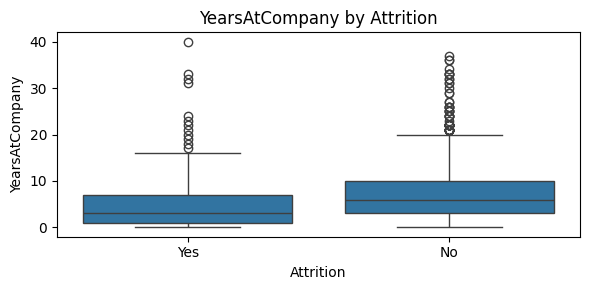

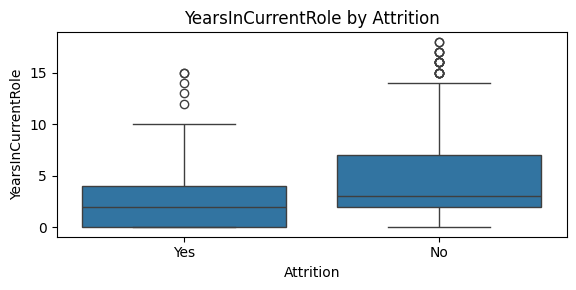

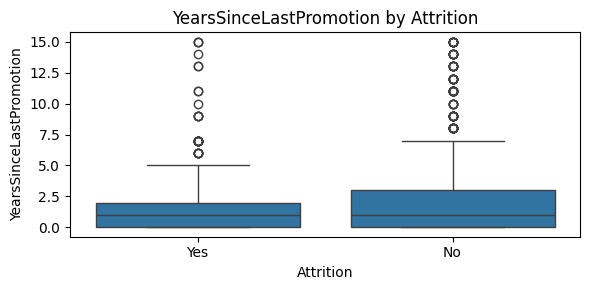

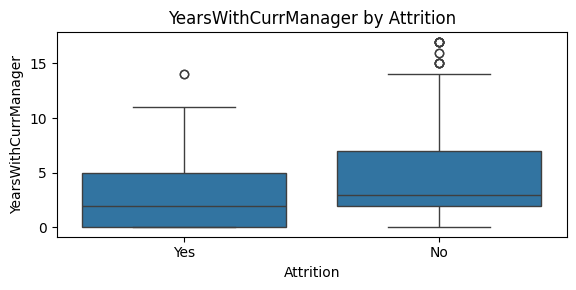

In [14]:
numerical_cols = HR_EDA.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=HR_EDA, x="Attrition", y=col)
    plt.title(f"{col} by Attrition")
    plt.tight_layout()
    %matplotlib inline
    plt.show()

**Highlights:**

Upon initial inspection, variables Age, DailyRate, DistanceFromHome, EnvironmentSatisfaction, JobLevel, JobSatisfaction, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWith CurrManager possibly seem to be affecting Attrition - the target variable.

The dataset has following numerical columns:  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Interquartile ranges: [13.0, 692.0, 12.0, 2.0, 2.0, 35.75, 1.0, 2.0, 2.0, 5468.0, 12414.5, 3.0, 6.0, 0.0, 2.0, 1.0, 9.0, 1.0, 1.0, 6.0, 5.0, 3.0, 5.0]
75% quartiles: [43.0, 1157.0, 14.0, 4.0, 4.0, 83.75, 3.0, 3.0, 4.0, 8379.0, 20461.5, 4.0, 18.0, 3.0, 4.0, 1.0, 15.0, 3.0, 3.0, 9.0, 7.0, 3.0, 7.0]
25% quartiles: [30.0, 465.0, 2.0, 2.0, 2.0, 48.0, 2.0, 1.0, 2.0, 2911.0, 8047.0, 1.0, 12.0, 3.0, 2.0, 0.0, 6.0, 2.0, 2.0, 3.0, 2.0, 0.0, 2.0]

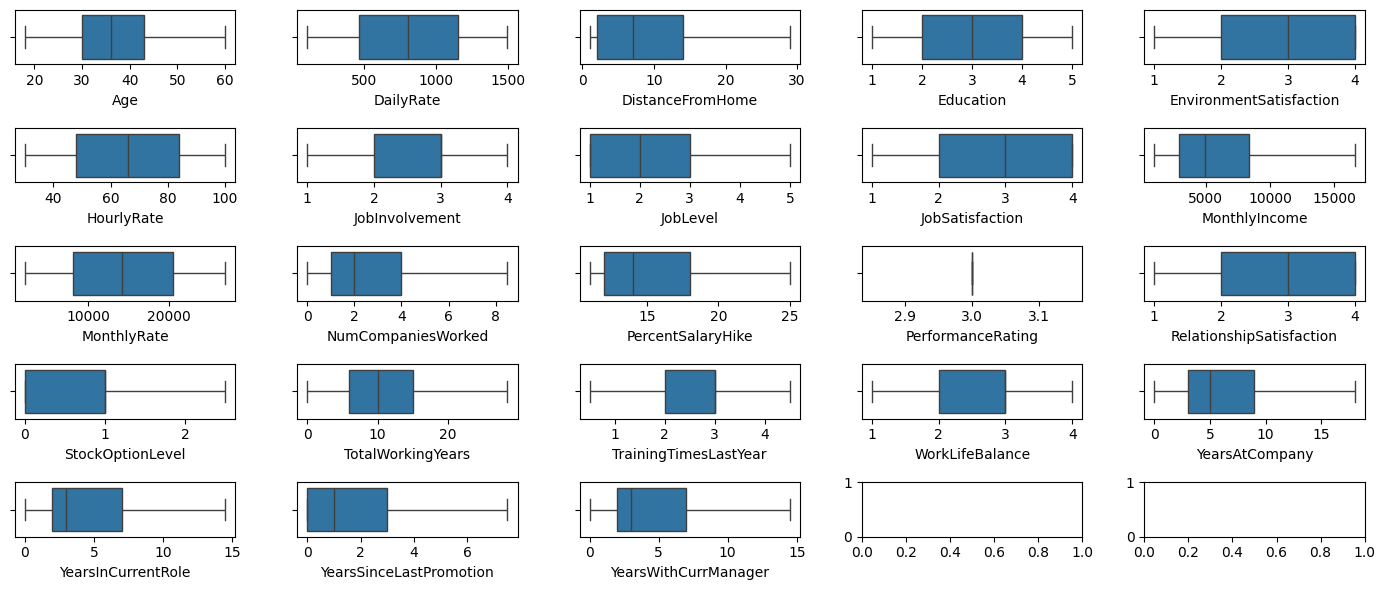

In [15]:
#removing outliers based on boxplot analysis
numeric_cols = HR_EDA.select_dtypes(include=['float64', 'int'])
#print(numeric_cols)

# Calculate Q1, Q3, and IQR
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)
iqr = q3 - q1

print("The dataset has following numerical columns: ", numerical_cols)
print("Interquartile ranges:", iqr.tolist())
print("75% quartiles:", q3.tolist())
print("25% quartiles:", q1.tolist())

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Replace outliers with bounds
numeric_cols_clipped = numeric_cols.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Replace the original numeric columns in the dataset
HR_EDA[numeric_cols.columns] = numeric_cols_clipped

# Descriptive statistics
HR_EDA.describe()

fig, axes = plt.subplots(5, 5, figsize=(14, 6)) # alterar aqui de acordo com o nº de variáveis numéricas

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.boxplot(ax=ax, data=HR_EDA, x=col)

plt.tight_layout()
plt.show()

JobLevel, MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion are all right-skewed variables.

`MonthlyIncome` , `TotalWorkingYears` , `YearsAtCompany` and `YearsSinceLastPromotion` are especially right-skewed, so we should use a **log transformation** for these variables.

In [16]:
HR_EDA['MonthlyIncomeLog'] = np.log(HR_EDA['MonthlyIncome']+1#, where=HR_1['MonthlyIncome']>0
                                  )
HR_EDA['TotalWorkingYearsLog'] = np.log(HR_EDA['TotalWorkingYears']+1#, where=HR_1['TotalWorkingYears']>0
                                      )
HR_EDA['YearsAtCompanyLog'] = np.log(HR_EDA['YearsAtCompany']+1#, where=HR_1['YearsAtCompany']>0
                                   )
HR_EDA['YearsSinceLastPromotionLog'] = np.log(HR_EDA['YearsSinceLastPromotion']+1#, where=HR_1['YearsSinceLastPromotion']>0
                                            )

HR_EDA.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8.0,Yes,11,3,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0,8.698514,2.197225,1.945910,0.000000
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1.0,No,23,3,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0,8.543056,2.397895,2.397895,0.693147
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6.0,Yes,15,3,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0,7.645398,2.079442,0.000000,0.000000
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1.0,Yes,11,3,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0,7.975908,2.197225,2.197225,1.386294
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,8.5,No,12,3,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0,8.151622,1.945910,1.098612,1.098612


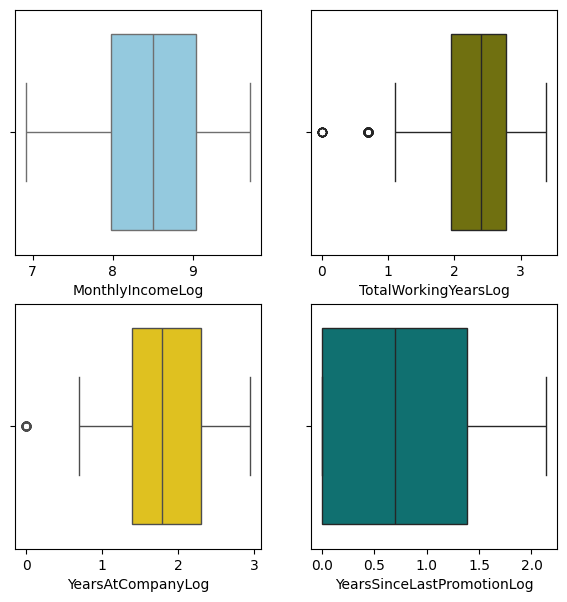

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.boxplot(data=HR_EDA, x="MonthlyIncomeLog", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=HR_EDA, x="TotalWorkingYearsLog", color="olive", ax=axs[0, 1])
sns.boxplot(data=HR_EDA, x="YearsAtCompanyLog", color="gold", ax=axs[1, 0])
sns.boxplot(data=HR_EDA, x="YearsSinceLastPromotionLog", color="teal", ax=axs[1, 1])

plt.show()

There are people with 0 TotalWorkingYears and 0 YearsAtCompany.

<Figure size 600x400 with 0 Axes>

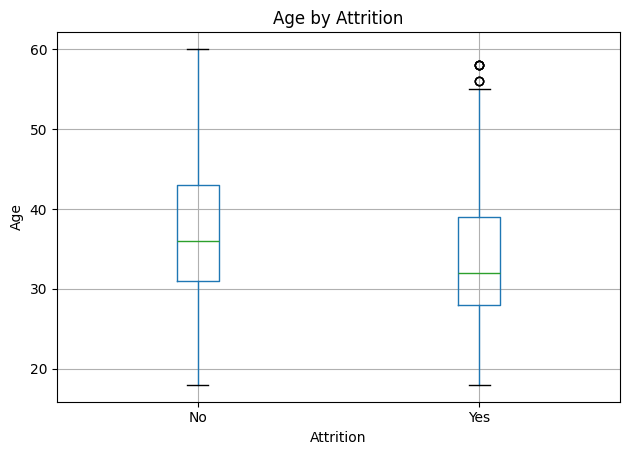

<Figure size 600x400 with 0 Axes>

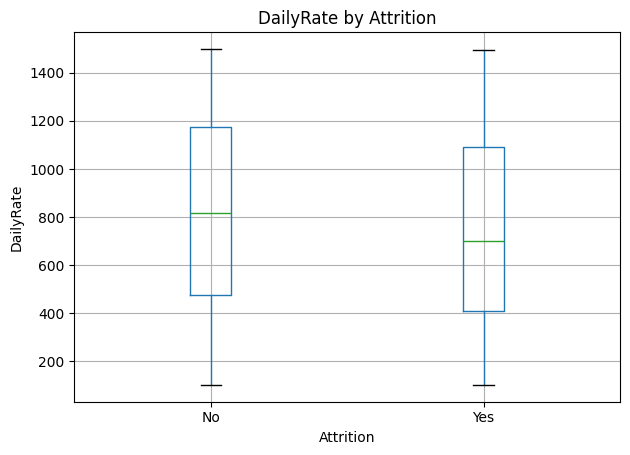

<Figure size 600x400 with 0 Axes>

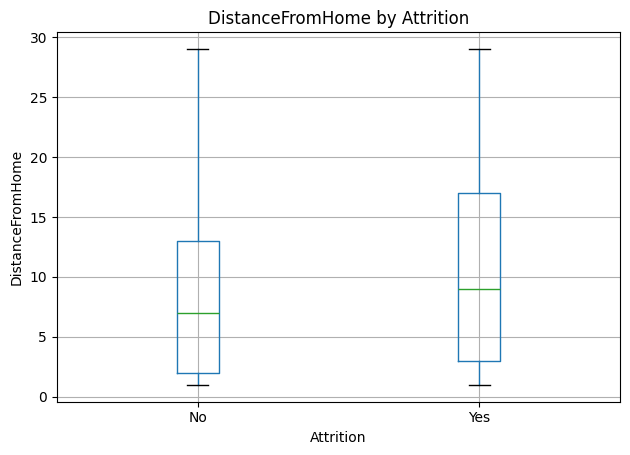

<Figure size 600x400 with 0 Axes>

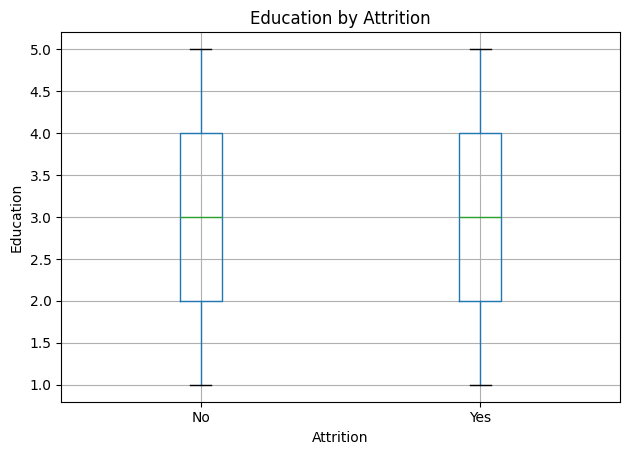

<Figure size 600x400 with 0 Axes>

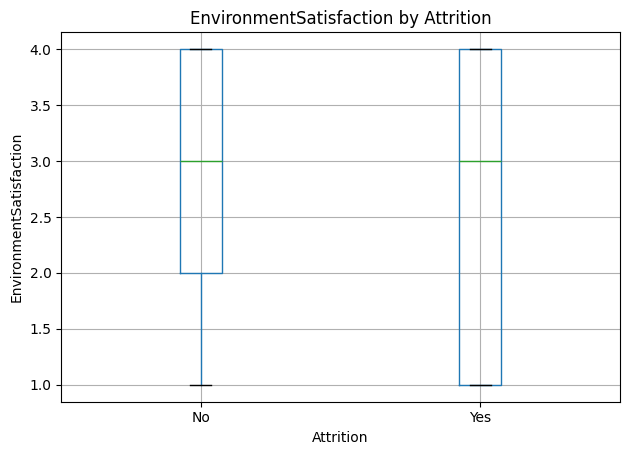

<Figure size 600x400 with 0 Axes>

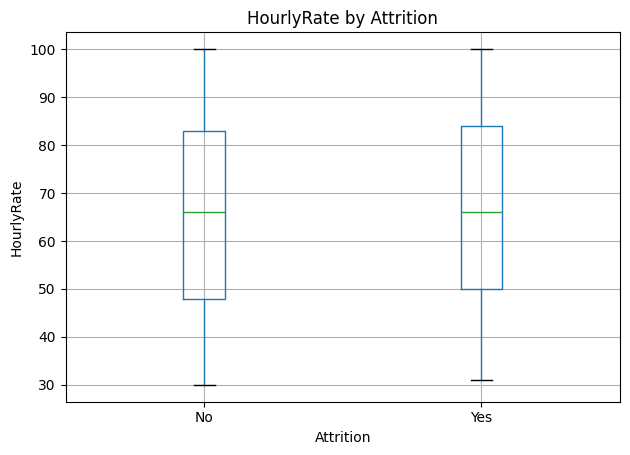

<Figure size 600x400 with 0 Axes>

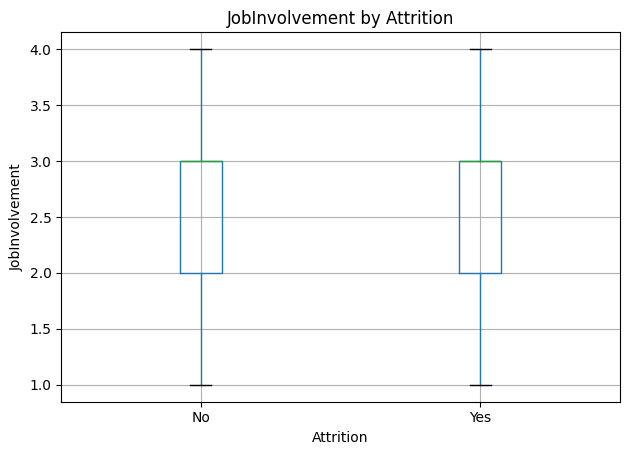

<Figure size 600x400 with 0 Axes>

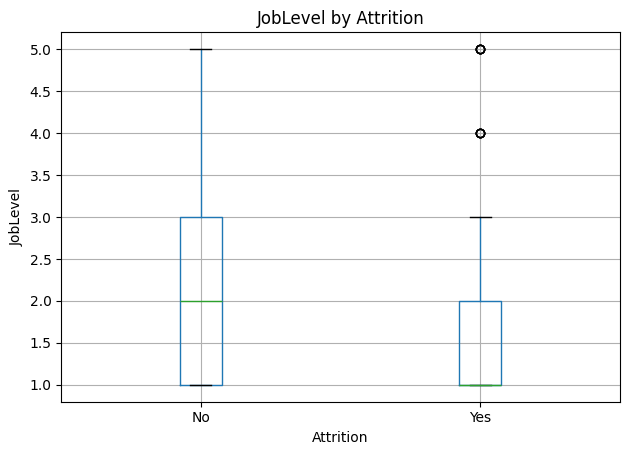

<Figure size 600x400 with 0 Axes>

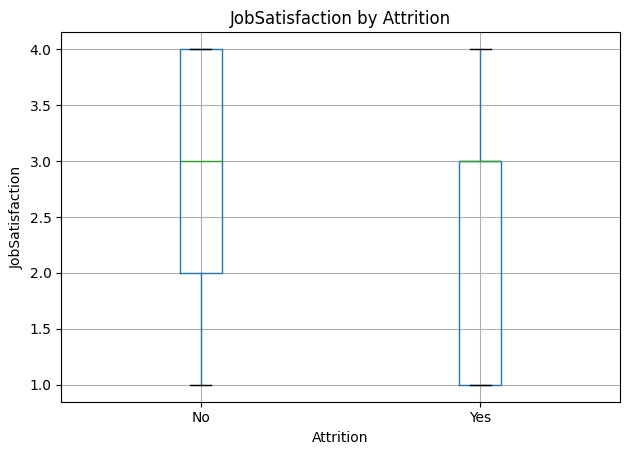

<Figure size 600x400 with 0 Axes>

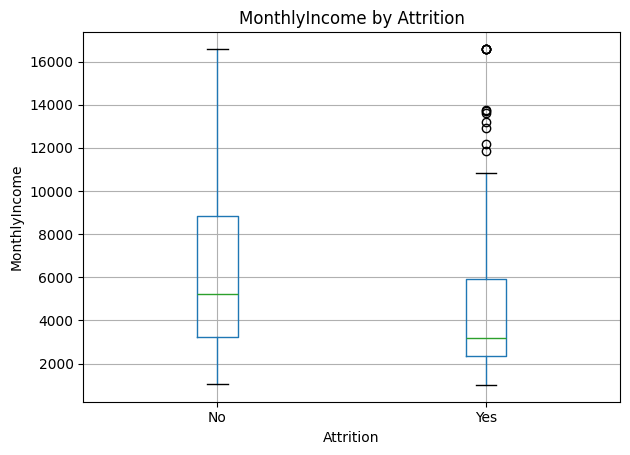

<Figure size 600x400 with 0 Axes>

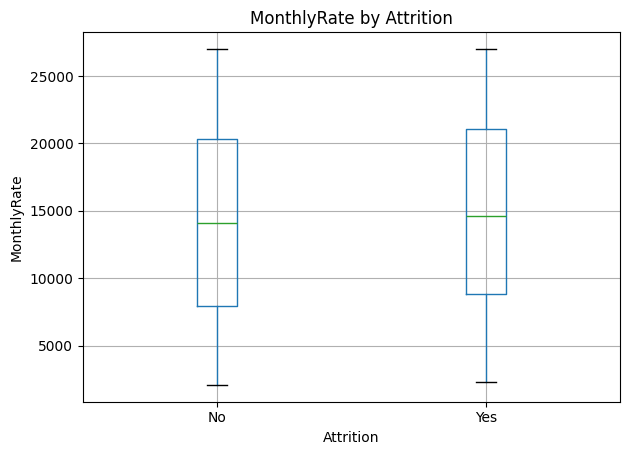

<Figure size 600x400 with 0 Axes>

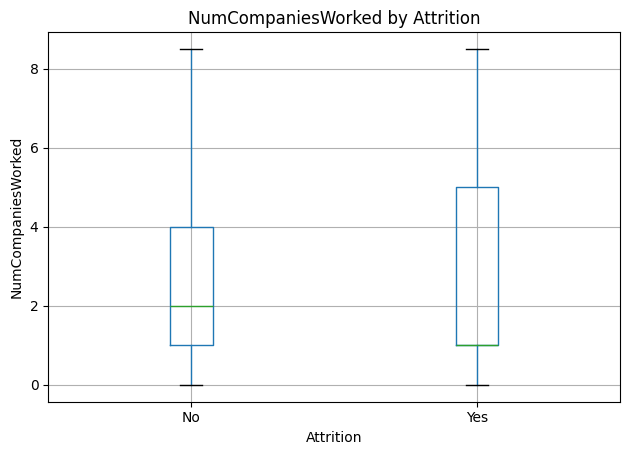

<Figure size 600x400 with 0 Axes>

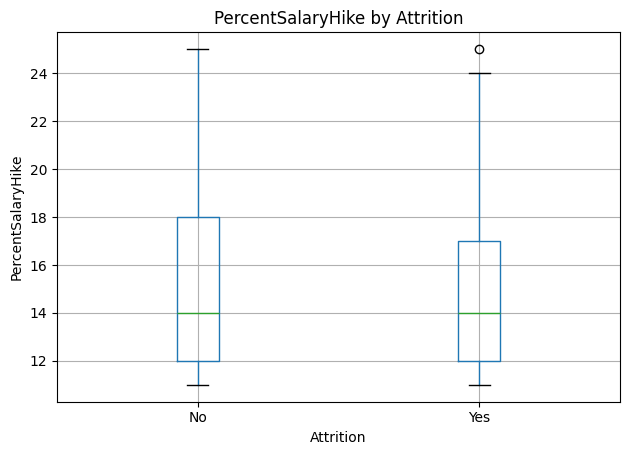

<Figure size 600x400 with 0 Axes>

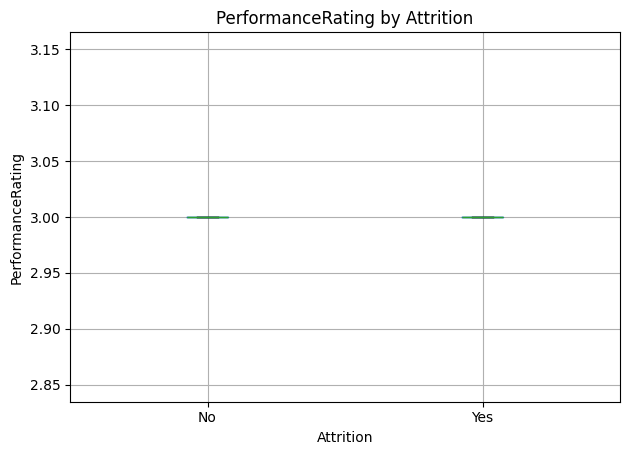

<Figure size 600x400 with 0 Axes>

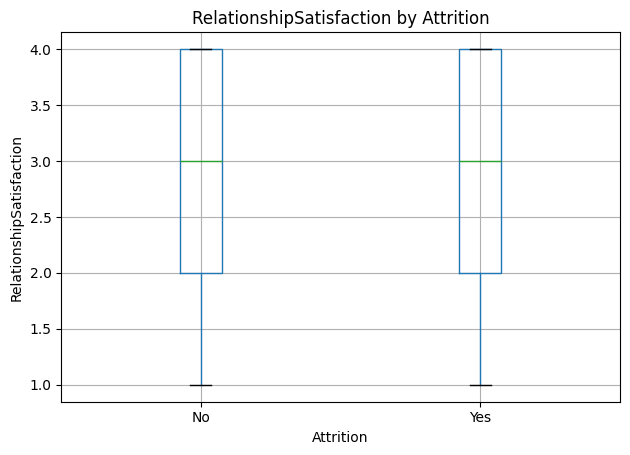

<Figure size 600x400 with 0 Axes>

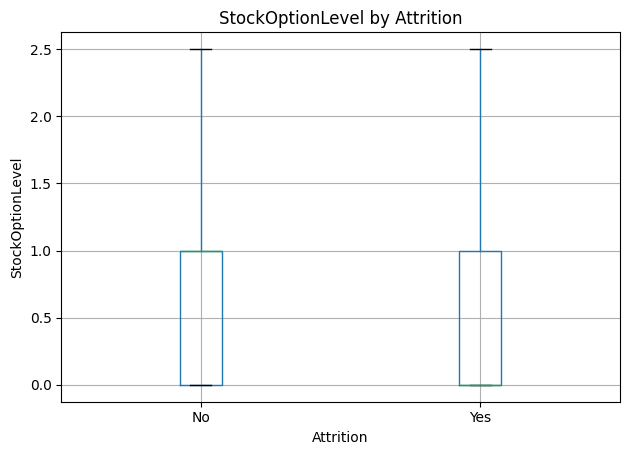

<Figure size 600x400 with 0 Axes>

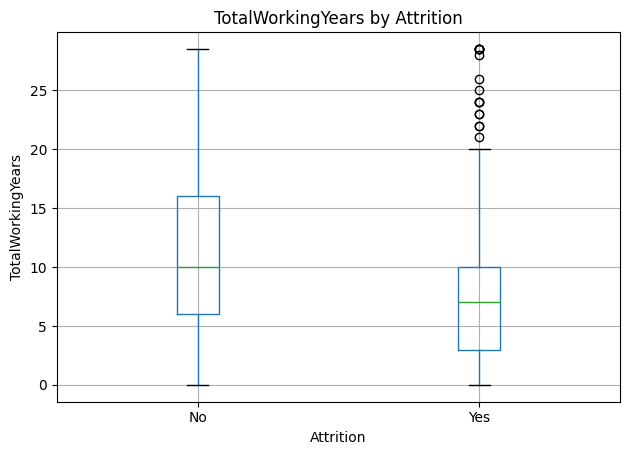

<Figure size 600x400 with 0 Axes>

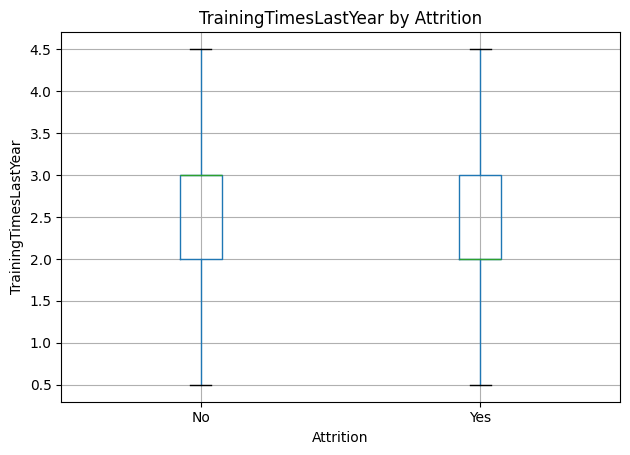

<Figure size 600x400 with 0 Axes>

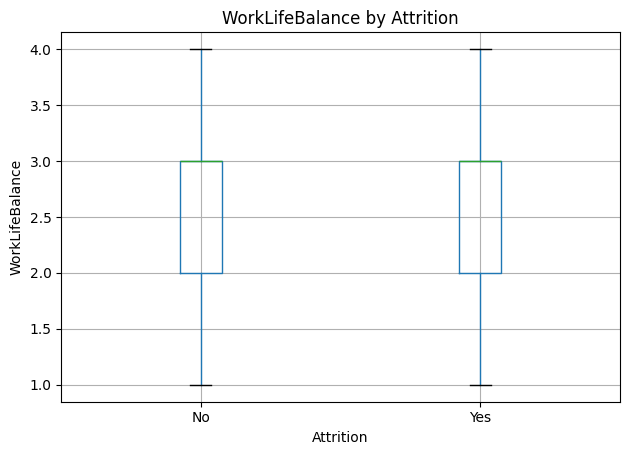

<Figure size 600x400 with 0 Axes>

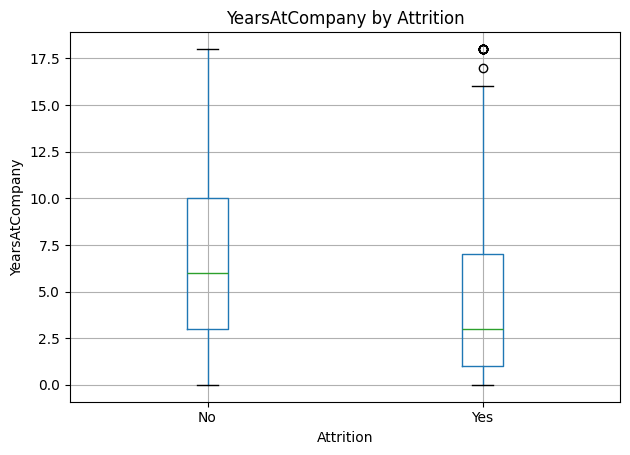

<Figure size 600x400 with 0 Axes>

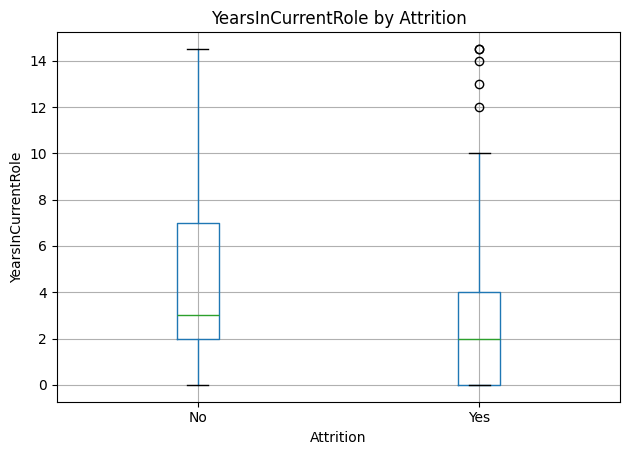

<Figure size 600x400 with 0 Axes>

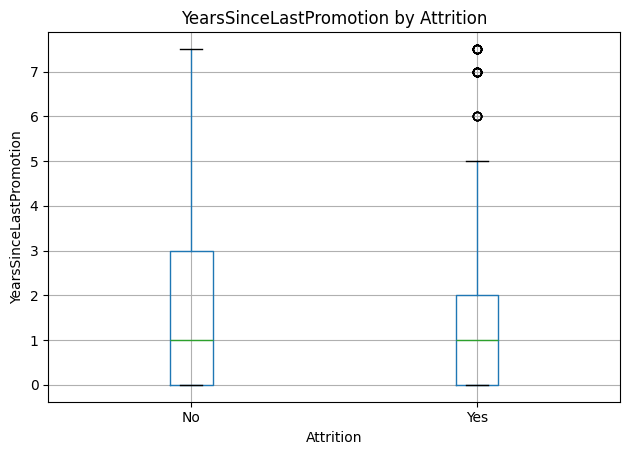

<Figure size 600x400 with 0 Axes>

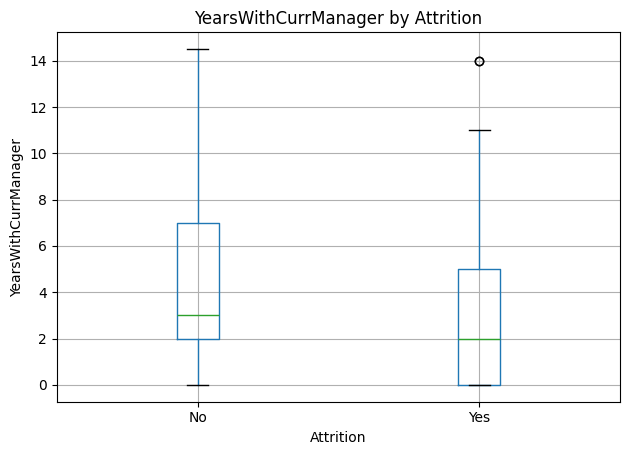

<Figure size 600x400 with 0 Axes>

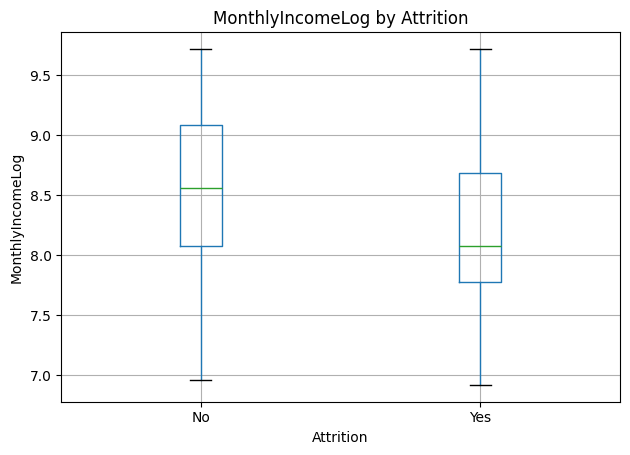

<Figure size 600x400 with 0 Axes>

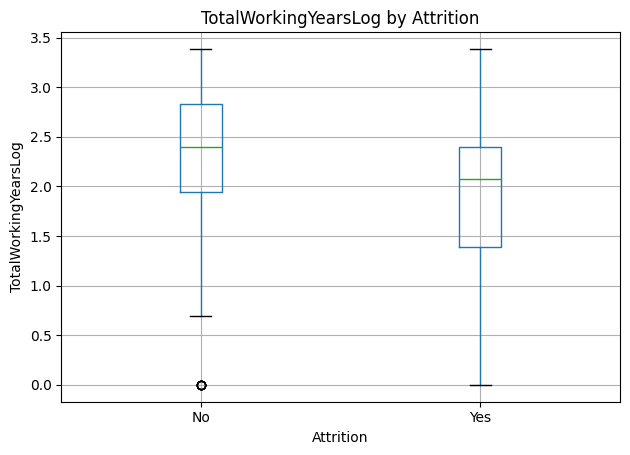

<Figure size 600x400 with 0 Axes>

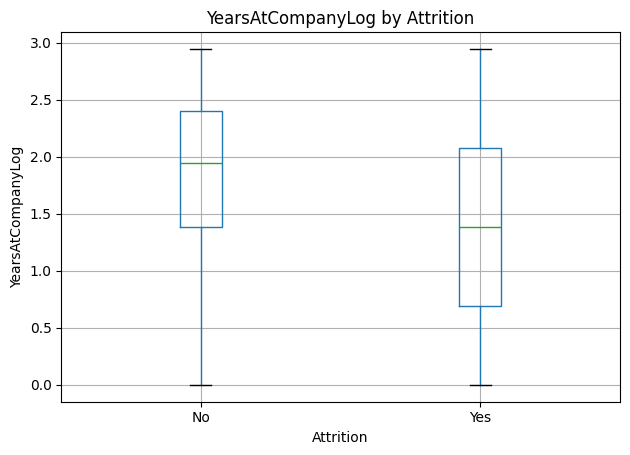

<Figure size 600x400 with 0 Axes>

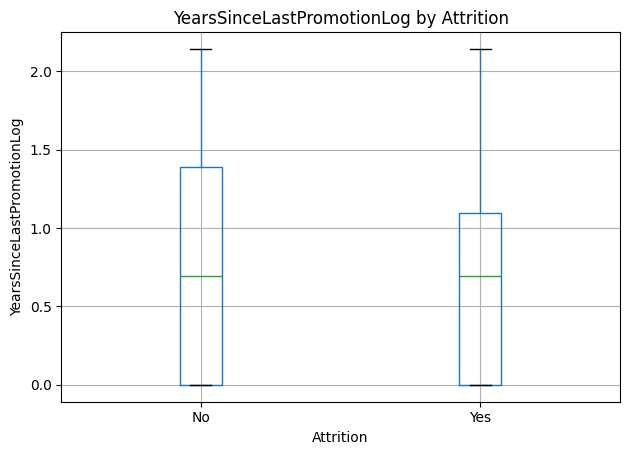

In [20]:
# Select numerical columns automatically
num_cols = HR_EDA.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove Target variable if numeric
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

# Loop through numeric columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    HR_EDA.boxplot(column=col, by='Attrition')
    plt.title(f'{col} by Attrition')
    plt.suptitle("")  # Removes default pandas title
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


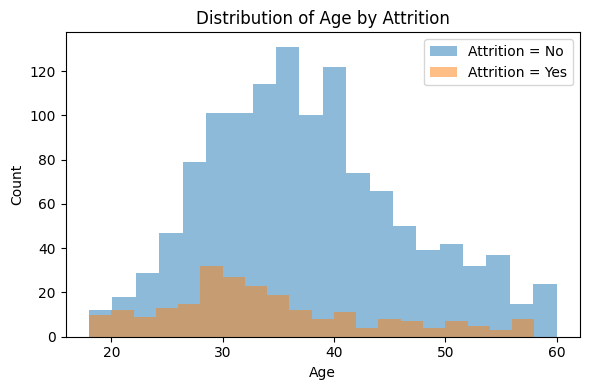

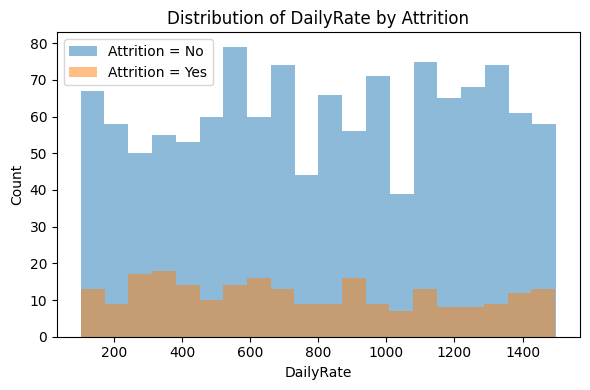

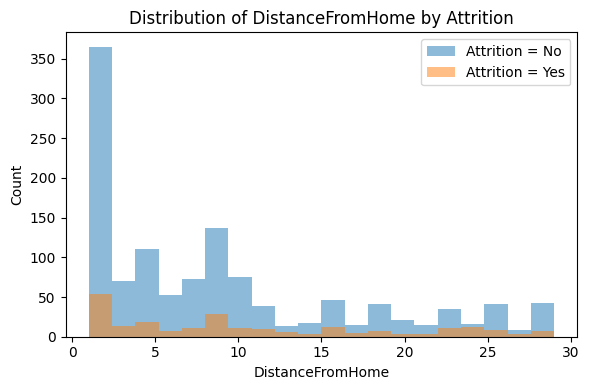

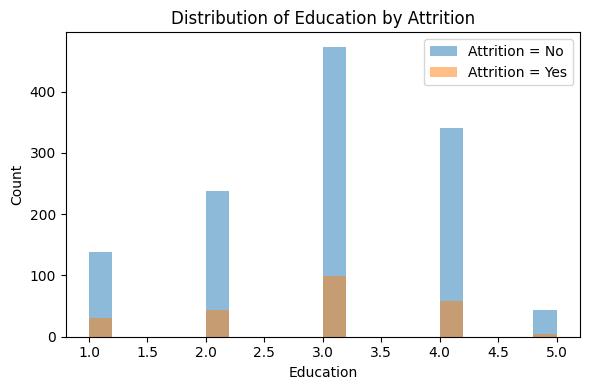

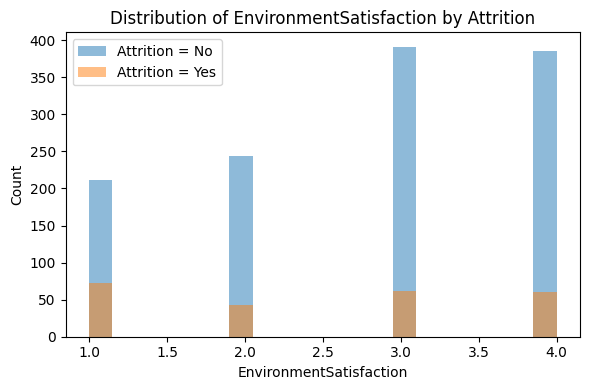

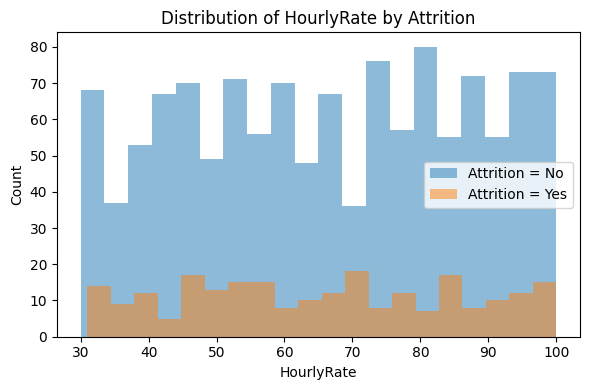

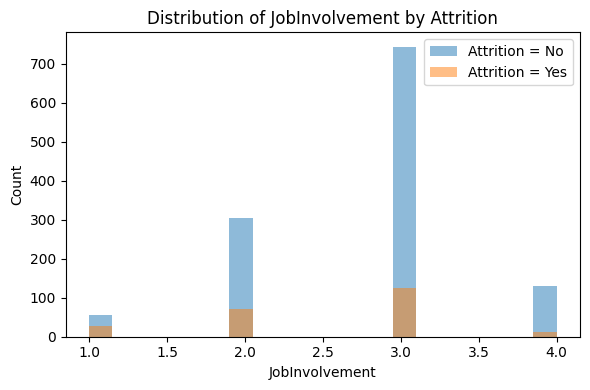

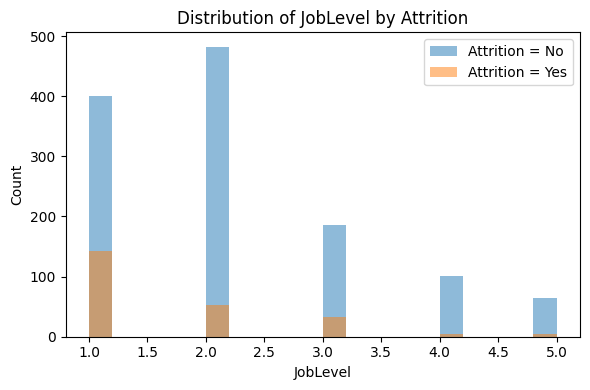

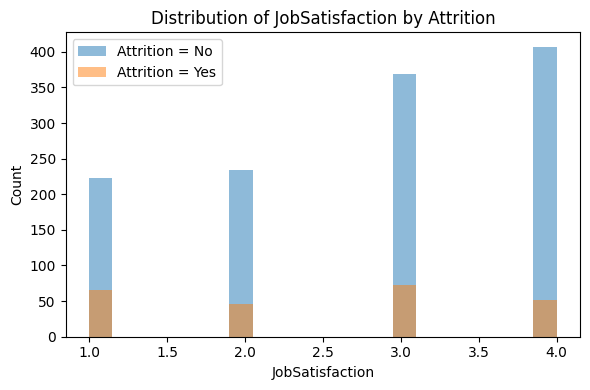

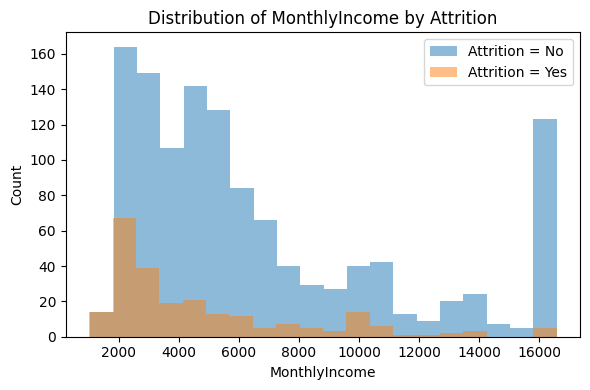

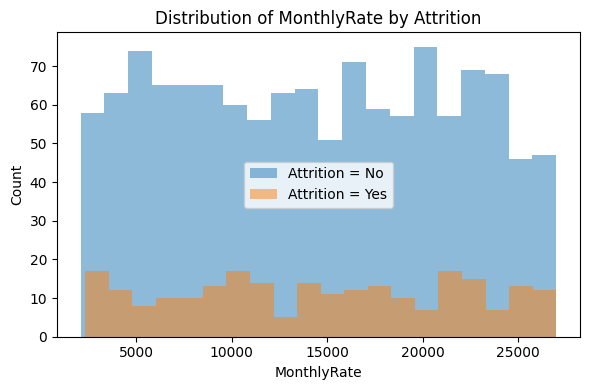

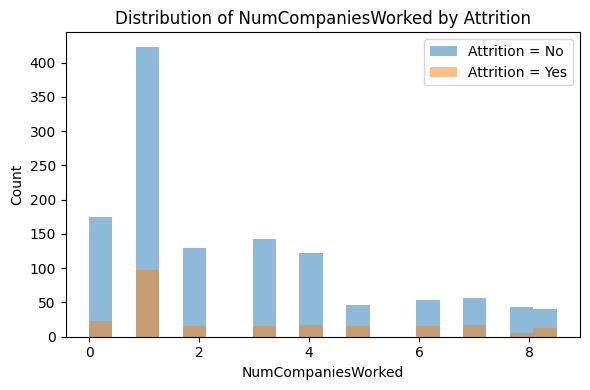

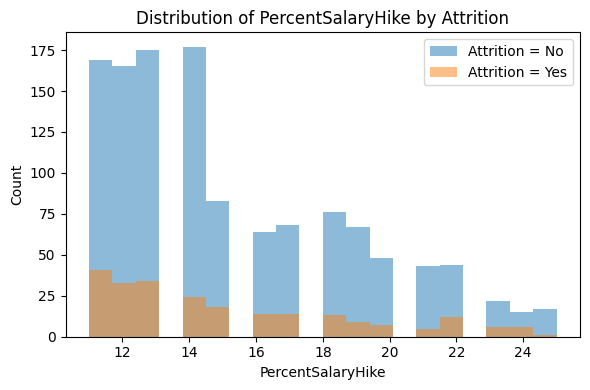

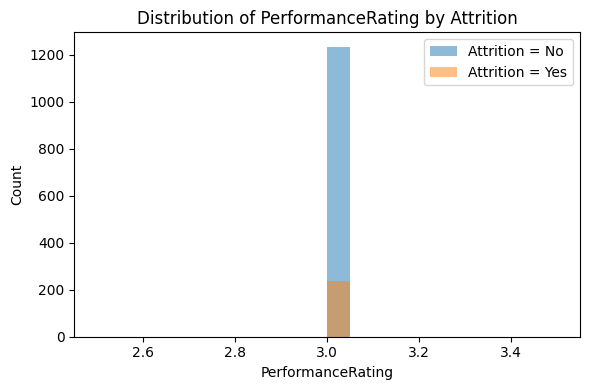

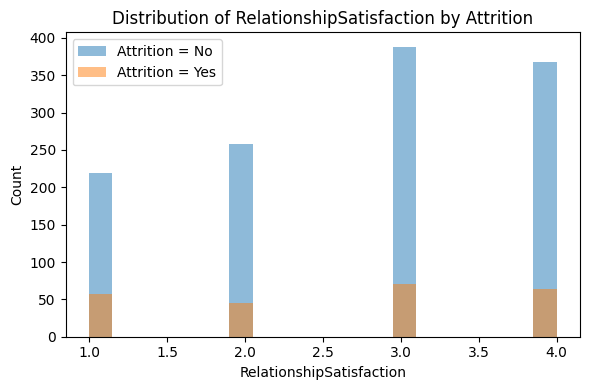

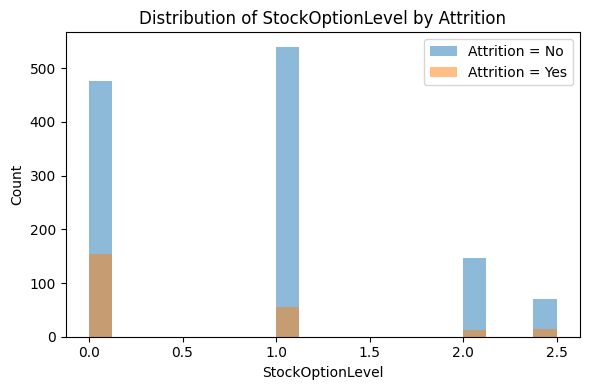

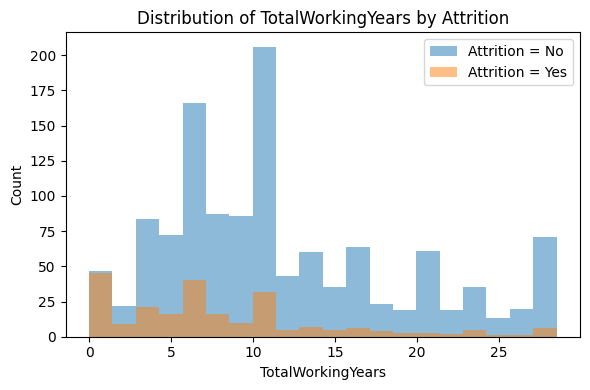

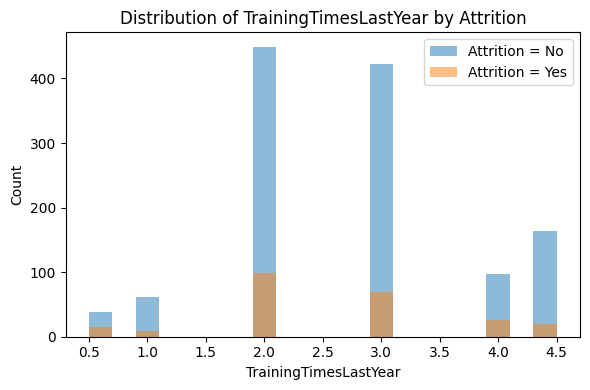

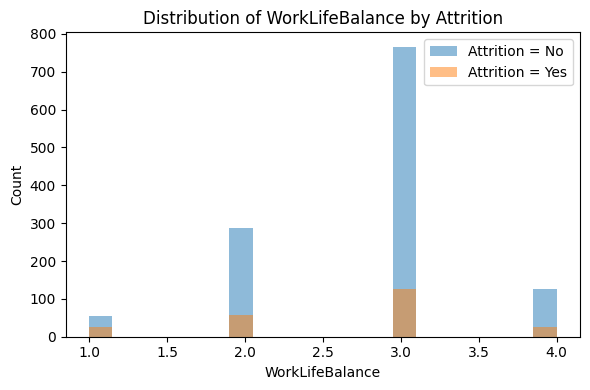

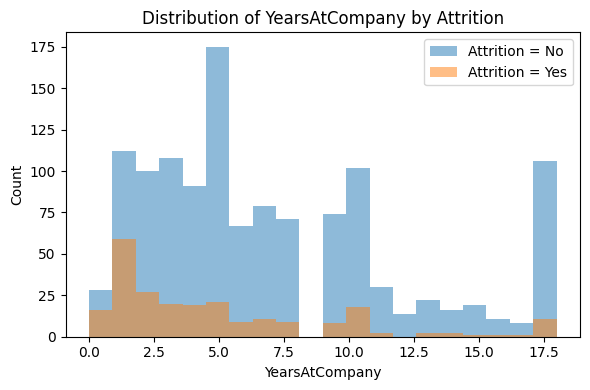

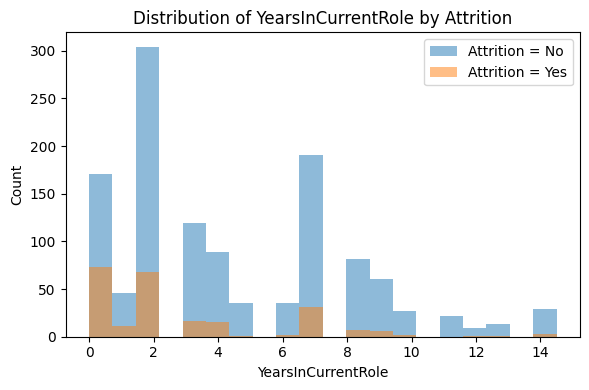

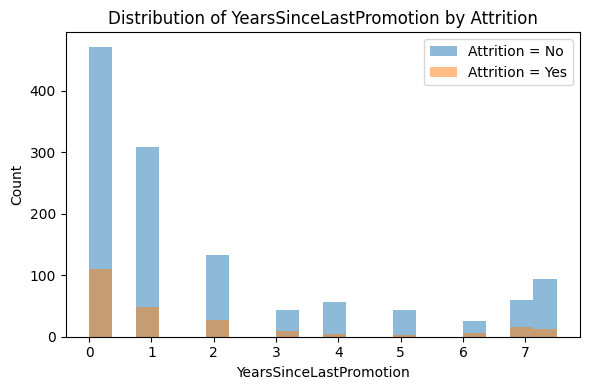

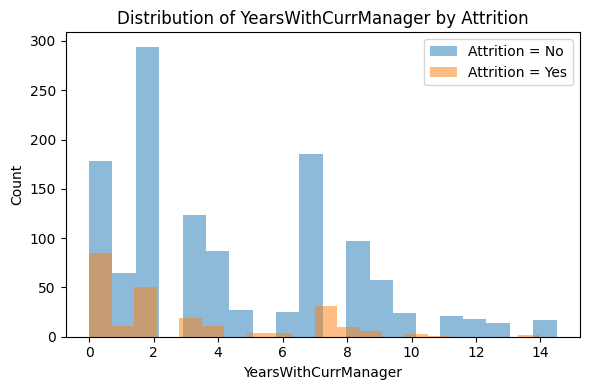

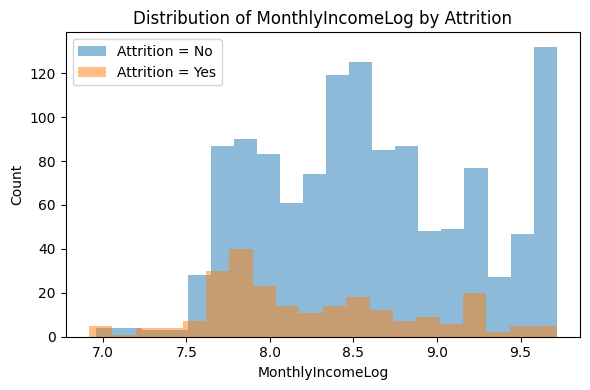

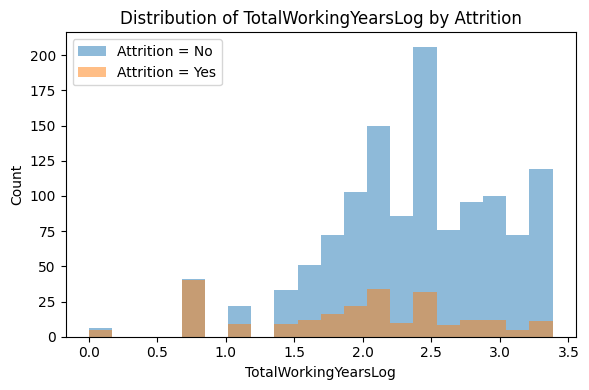

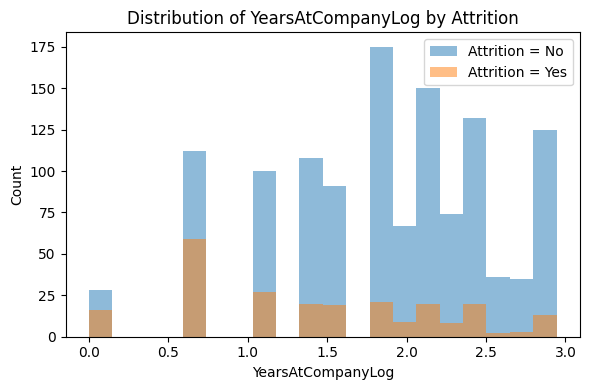

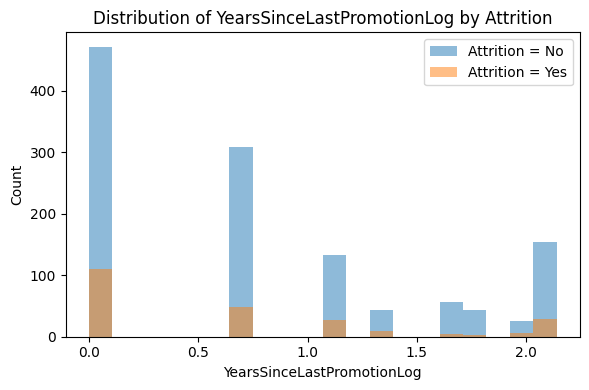

In [21]:
# Identify numeric columns
num_cols = HR_EDA.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

# Plot overlapping transparent histograms for each numeric variable
for col in num_cols:
    plt.figure(figsize=(6,4))

    # Histogram for Attrition = No
    HR_EDA[HR_EDA['Attrition'] == 'No'][col].plot.hist(
        bins=20, alpha=0.5, histtype='stepfilled'
    )

    # Histogram for Attrition = Yes
    HR_EDA[HR_EDA['Attrition'] == 'Yes'][col].plot.hist(
        bins=20, alpha=0.5, histtype='stepfilled'
    )

    plt.title(f"Distribution of {col} by Attrition")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["Attrition = No", "Attrition = Yes"])
    plt.tight_layout()
    plt.show()

### **4.2. Ordinal categorical features**

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

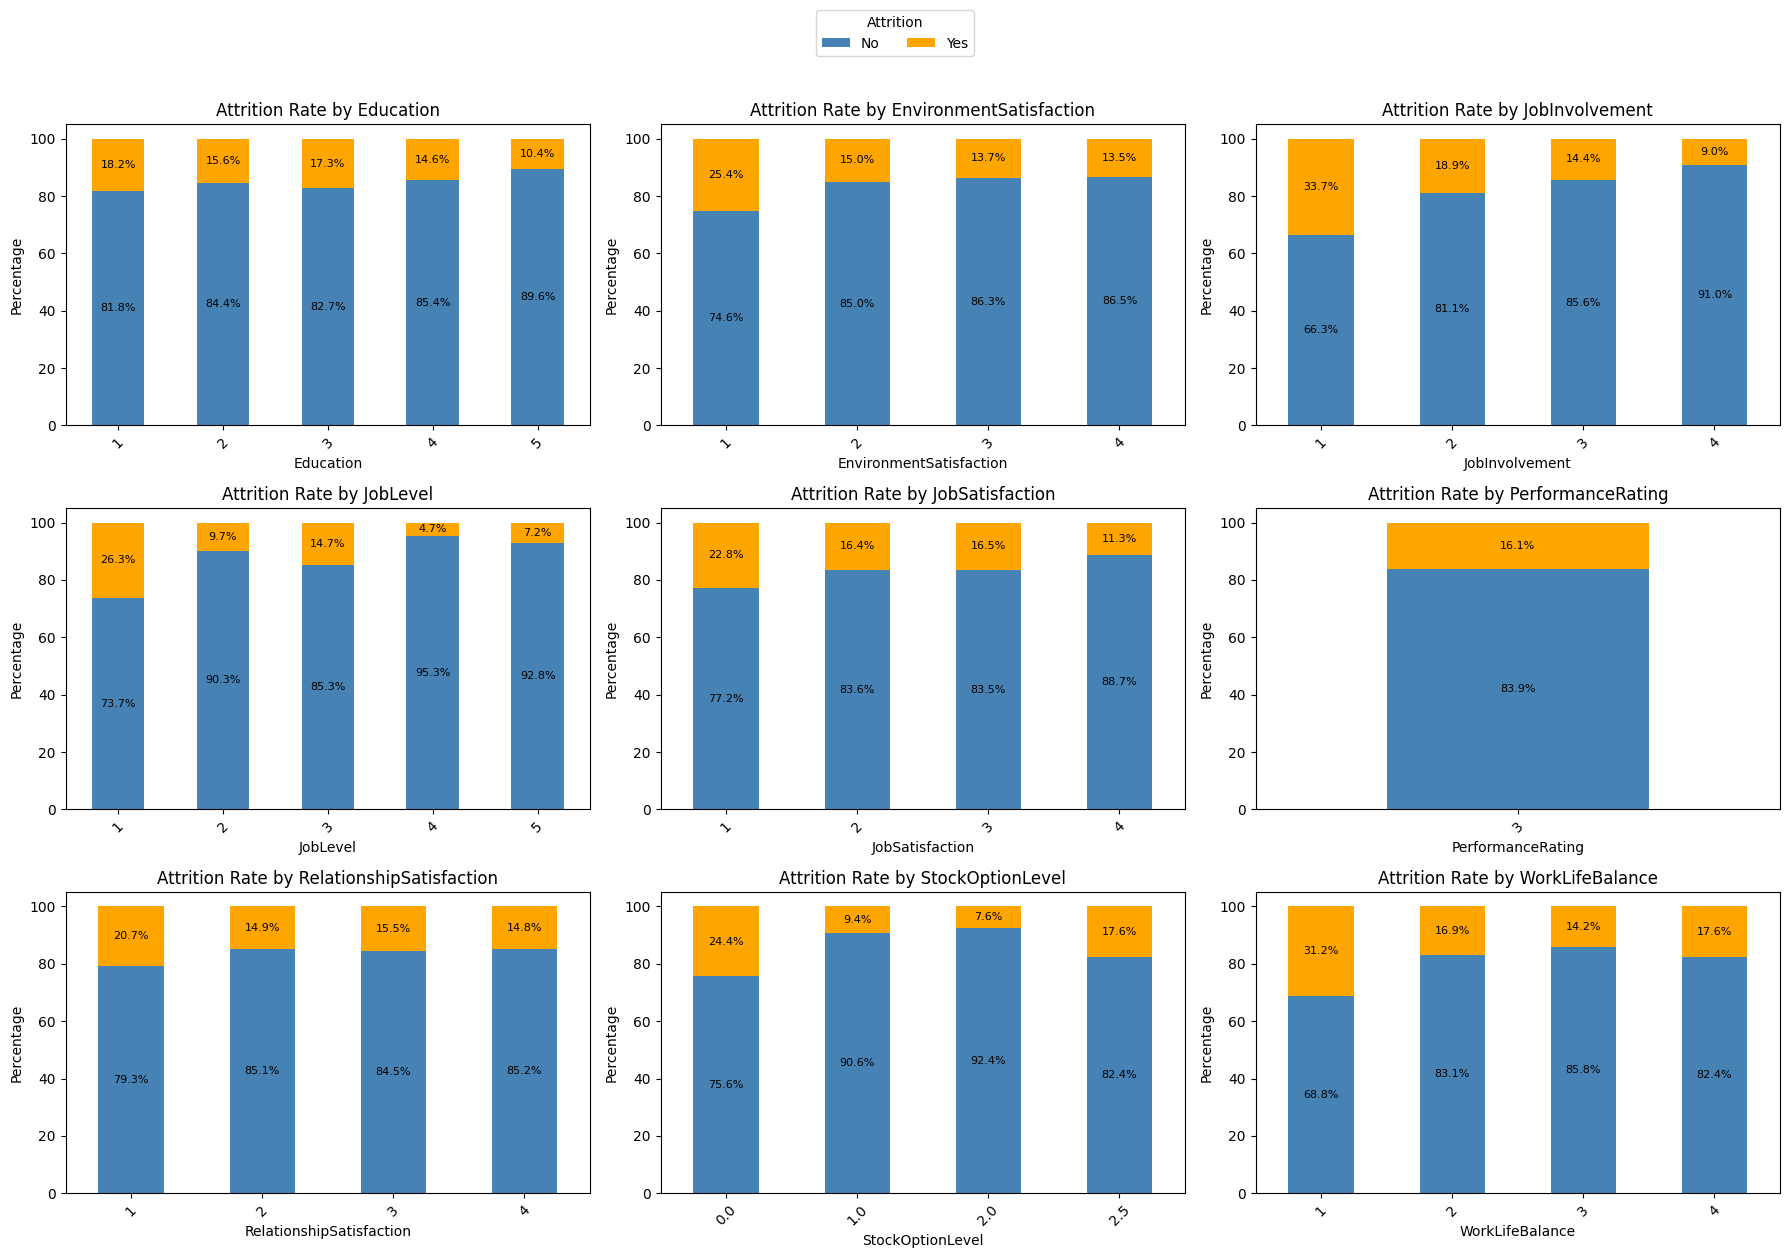

In [18]:
n_cols = 3
n_rows = int(np.ceil(len(ordinal_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

def autolabel_stacked(ax):
    """ add % in bars """
    for rect in ax.patches:
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        if height > 0:
            ax.text(
                x + width / 2.,
                y + height / 2.,
                f'{height:.1f}%', 
                ha='center', 
                va='center', 
                fontsize=8,
                color='black'
            )

# variables for legend capture
handles = []
labels = []

for idx, col in enumerate(ordinal_cols):
    crosstab = pd.crosstab(HR_EDA[col], HR_EDA['Attrition'], normalize='index') * 100
    ax = axes[idx]
    # capture the plot object to get handles/labels later
    plot_object = crosstab.plot(kind='bar', stacked=True, color=['steelblue', 'orange'], ax=ax)
    
    # Add % in the bars for better reading
    autolabel_stacked(ax)
    
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
    else:
        ax.get_legend().remove()

    ax.set_title(f'Attrition Rate by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.tick_params(axis='x', rotation=45)

# Figure legend
fig.legend(
    handles, 
    labels, 
    title='Attrition',
    loc='upper center',           
    bbox_to_anchor=(0.5, 1.05),    
    ncol=len(labels)               
)

plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()

#### **Conclusions**

- Performance rating doesn't have a significative difference for the target variable, meaning that isn't going to help explain. 

### **4.3. Nominal Categorical features**

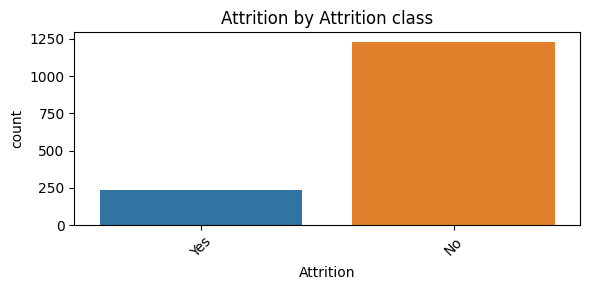

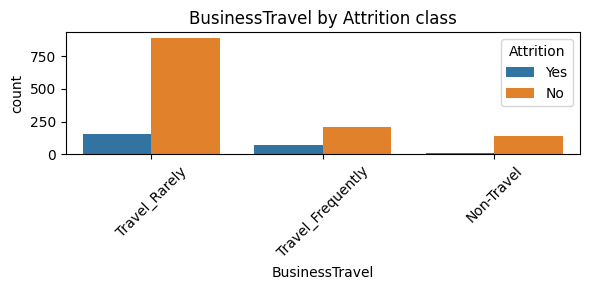

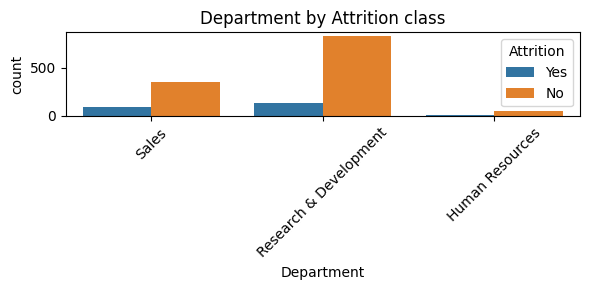

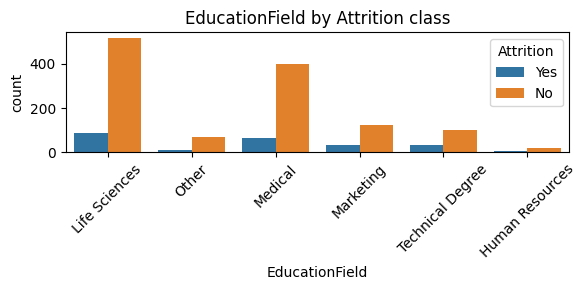

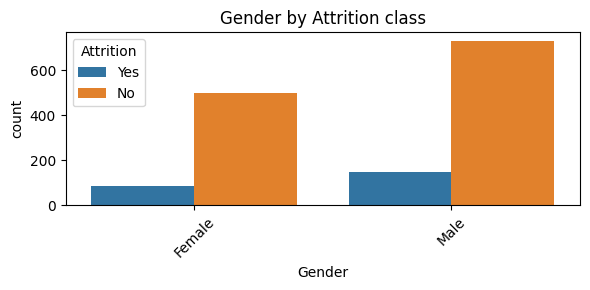

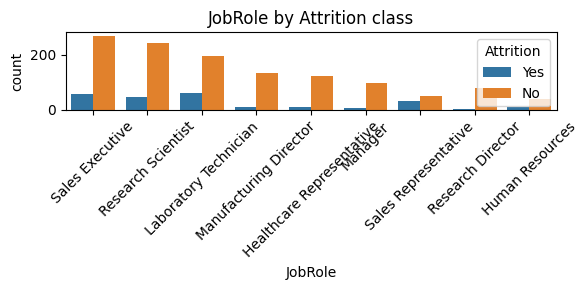

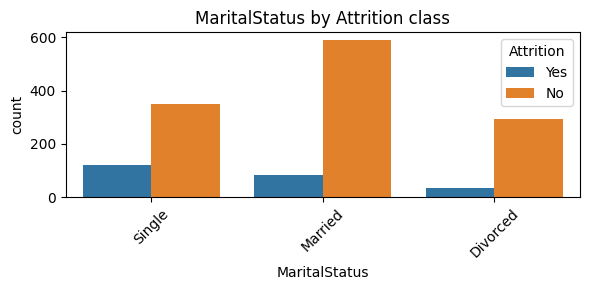

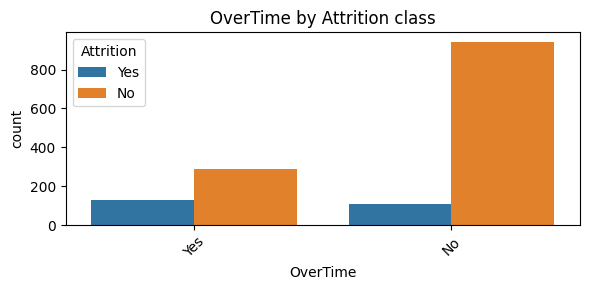

In [19]:
categorical_cols = HR_EDA.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=HR_EDA, x=col, hue="Attrition", stat='')
    plt.title(f"{col} by Attrition class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The Attrition target variable is unbalanced, therefore it is better to use percentages rather than absolute values to check for relationships with the other variables.

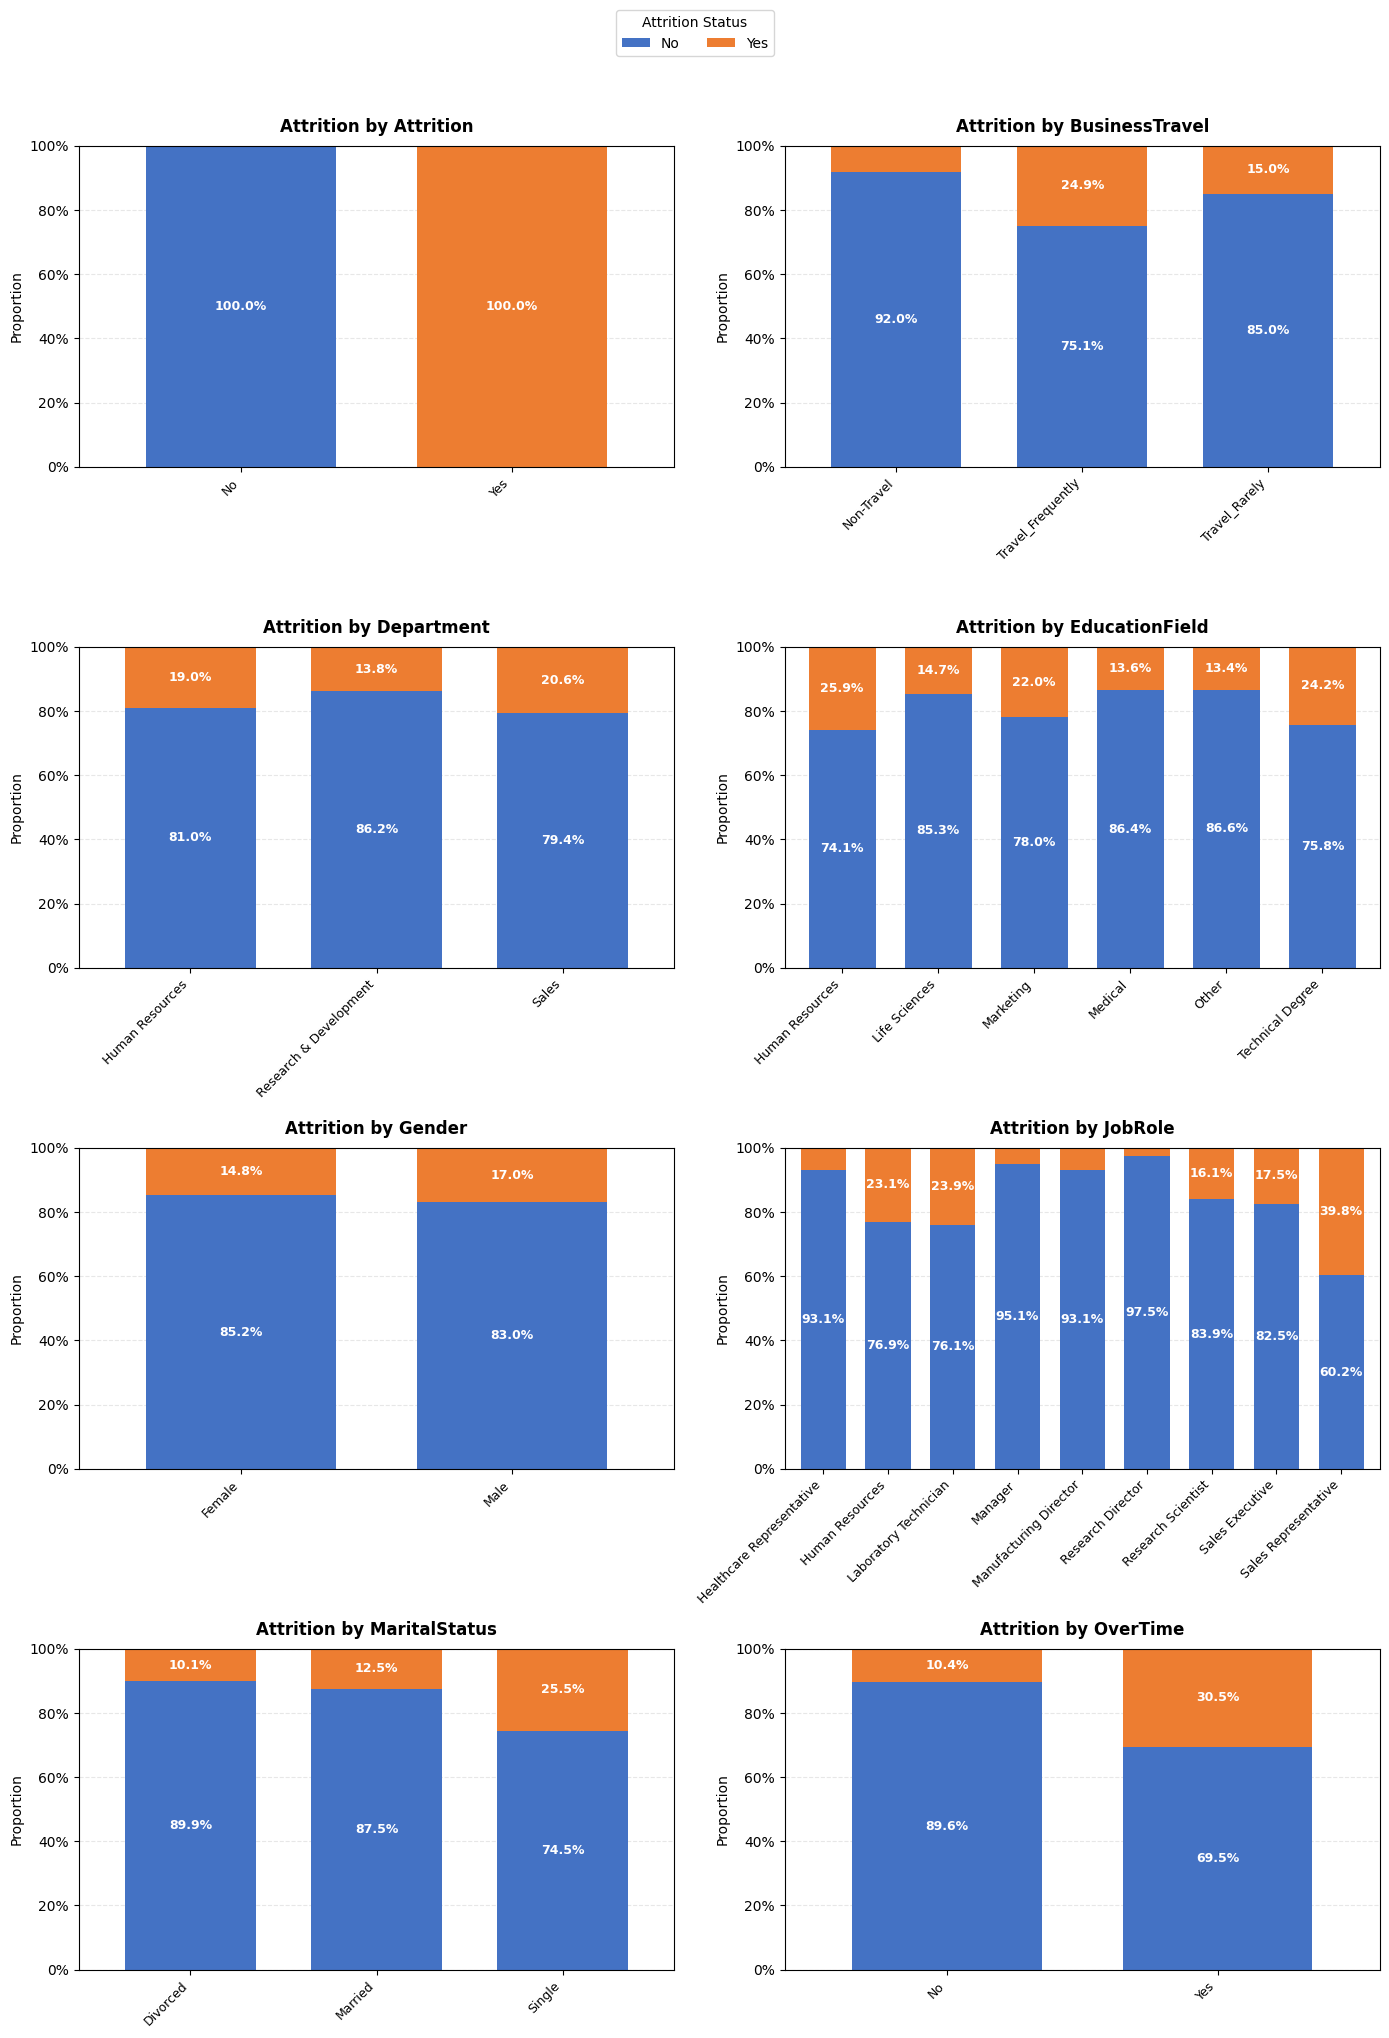

In [20]:

n_cols = 2
n_rows = int(np.ceil(len(categorical_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 7, n_rows * 5))
axes = axes.flatten()

def autolabel_stacked(ax, crosstab):
    """Add percentage labels inside the stacked bars, only if segment is large enough."""
    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            if height > 0.08:  # Only show label if segment > 8%
                ax.text(
                    bar.get_x() + bar.get_width() / 2.,
                    bar.get_y() + height / 2.,
                    f'{height * 100:.1f}%',
                    ha='center', 
                    va='center', 
                    fontsize=9,
                    fontweight='bold',
                    color='white'
                )

handles, labels = [], []

for idx, col in enumerate(categorical_cols):
    crosstab = pd.crosstab(HR_EDA[col], HR_EDA['Attrition'], normalize='index')
    ax = axes[idx]
    
    # Create stacked bar plot with better colors
    plot_object = crosstab.plot(
        kind='bar', 
        stacked=True, 
        color=['#4472C4', '#ED7D31'],  # Better contrast colors
        ax=ax,
        width=0.7
    )
    
    # Add percentage labels
    autolabel_stacked(ax, crosstab)
    
    # Capture legend only once
    if idx == 0:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    ax.set_title(f'Attrition by {col}', fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('')  # Remove redundant x-label
    ax.set_ylabel('Proportion', fontsize=10)
    ax.set_ylim(0, 1)
    
    # Improve x-axis labels
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
    
    # Add grid for easier reading
    ax.yaxis.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Remove extra subplots if any
for idx in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[idx])

# Add a single legend
fig.legend(
    handles, 
    labels, 
    title='Attrition Status', 
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.02), 
    ncol=len(labels),
    frameon=True,
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The categorical variables seemingly related to Attrition are BusinessTravel (Travel_Frequently), EducationField (Human Resources, Marketing, Technical Degree), JobRole (Sales Representatives, Laboratory Technicians and Human Resources), MaritalStatus (Single), and OverTime (Yes).

## 5. Scaling and Encoding

At this stage, both numerical and categorical features need to be treated.

On one hand, the **numerical features** need to be **scaled**. It is important to note that in this dataset, some numerical variables are actually **ordinal categorical features**, where numbers represent ordered categories. However, since the scale logic is consistent across the dataset, this transformation can be applied directly. For example, the Work-Life Balance variable is rated on a scale from 1 to 4, where 1 represents “Bad” and 4 represents “Best.” The Performance Rating feature follows the same structure, ranging from 1 (“Low”) to 4 (“Outstanding”).

Scaling is essential to prevent features with larger numerical ranges from dominating others, and it helps models such as Linear Regression and K-Nearest Neighbors converge more efficiently and accurately, leading to improved performance. In this project, the `MinMaxScaler()` was used, normalizing all variables to a range between 0 and 1.

On the other hand, **categorical features** must be **encoded** and converted into numerical representations so that machine learning algorithms can process and interpret them effectively.

### **5.1. Numerical features - Applying Scaler**

In [21]:

HR_EDA_1 = HR_EDA.copy()

# Seleciona apenas colunas numéricas (int64, float64)
numeric_cols = HR_EDA_1.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
HR_EDA_1[numeric_cols] = scaler.fit_transform(HR_EDA_1[numeric_cols])

HR_EDA_1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.547619,Yes,Travel_Rarely,0.715820,Sales,0.000000,0.25,Life Sciences,0.333333,Female,0.914286,0.666667,0.25,Sales Executive,1.000000,Single,0.320062,0.698053,0.941176,Yes,0.000000,0.0,0.000000,0.0,0.280702,0.000,0.000000,0.333333,0.275862,0.000000,0.344828,0.636374,0.649223,0.660876,0.000000
2,0.738095,No,Travel_Frequently,0.126700,Research & Development,0.250000,0.00,Life Sciences,0.666667,Male,0.442857,0.333333,0.25,Research Scientist,0.333333,Married,0.264642,0.916001,0.117647,No,0.857143,0.0,1.000000,0.4,0.350877,0.625,0.666667,0.555556,0.482759,0.133333,0.482759,0.580821,0.708516,0.814381,0.323891
4,0.452381,Yes,Travel_Rarely,0.909807,Research & Development,0.035714,0.25,Other,1.000000,Male,0.885714,0.333333,0.00,Laboratory Technician,0.666667,Single,0.069419,0.012126,0.705882,Yes,0.285714,0.0,0.333333,0.0,0.245614,0.625,0.666667,0.000000,0.000000,0.000000,0.000000,0.260042,0.614421,0.000000,0.000000
5,0.357143,No,Travel_Frequently,0.923407,Research & Development,0.071429,0.75,Life Sciences,1.000000,Female,0.371429,0.666667,0.00,Research Scientist,0.666667,Married,0.122014,0.845814,0.117647,Yes,0.000000,0.0,0.666667,0.0,0.280702,0.625,0.666667,0.444444,0.482759,0.400000,0.000000,0.378150,0.649223,0.746229,0.647781
7,0.214286,No,Travel_Rarely,0.350036,Research & Development,0.035714,0.00,Medical,0.000000,Male,0.142857,0.666667,0.00,Laboratory Technician,0.333333,Married,0.157912,0.583738,1.000000,No,0.071429,0.0,1.000000,0.4,0.210526,0.625,0.666667,0.111111,0.137931,0.266667,0.137931,0.440941,0.574966,0.373114,0.513354


### **5.2. Categorical features - Applying encoding**

Due to the nature of the problem and the characteristics of features, the encoding needs to be performed case by case. 

- Department and job roles - any option is dropped
- Education Field - drop the other option 
- BusinessTravel, Gender, MaritalStatus,  OverTime
- Attrition mapped as binary

In [22]:
# Department: do not drop any category
HR_1_1 = pd.get_dummies(HR_EDA, columns=['Department'], drop_first=False)

# EducationField: drop only 'Other'
edu_dummies = pd.get_dummies(HR_1_1['EducationField'], prefix='EducationField')
edu_dummies = edu_dummies.drop('EducationField_Other', axis=1)
HR_1_1 = pd.concat([HR_1_1.drop('EducationField', axis=1), edu_dummies], axis=1)

# JobRole: do not drop any category
HR_1_1 = pd.get_dummies(HR_1_1, columns=['JobRole'], drop_first=False)

# For the remaining categorical variables, drop first as before
HR_1_1 = pd.get_dummies(
    HR_1_1,
    columns=['BusinessTravel', 'Gender', 'MaritalStatus', 'OverTime'],
    drop_first=True
)

# Encode the target variable 'Attrition' as binary
HR_1_1['Attrition'] = HR_1_1['Attrition'].map({'Yes': 1, 'No': 0})

HR_1_1.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncomeLog,TotalWorkingYearsLog,YearsAtCompanyLog,YearsSinceLastPromotionLog,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,2,2,94,3,2,4,5993,19479,8.0,11,3,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0,8.698514,2.197225,1.945910,0.000000,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True
2,49,0,279,8,1,3,61,2,2,2,5130,24907,1.0,23,3,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0,8.543056,2.397895,2.397895,0.693147,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,False,False
4,37,1,1373,2,2,4,92,2,1,3,2090,2396,6.0,15,3,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0,7.645398,2.079442,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,True
5,33,0,1392,3,4,4,56,3,1,3,2909,23159,1.0,11,3,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0,7.975908,2.197225,2.197225,1.386294,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True
7,27,0,591,2,1,1,40,3,1,2,3468,16632,8.5,12,3,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0,8.151622,1.945910,1.098612,1.098612,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False


### **Result dataframe: HR_1_1 - has the variables encoded**

In [23]:
# save the resulting dataframe
processed_dir = base_path / "data" / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)
output_path = processed_dir / "HR_1_1.csv"
HR_1_1.to_csv(output_path, index=True)
print(f"Saved HR_1_1 to: {output_path}")

Saved HR_1_1 to: c:\Users\RitaML\Documents\GitHub\EDSB25_10\data\processed\HR_1_1.csv
